# นางสาว อารีญา สมิงแก้ว  61070365

## Assignment 1 

<h4>นำเข้า Package สำหรับการดึงข้อมูลจาก API การจัดการข้อมูลรวมถึง Package สำหรับใช้ในการ plot Graph

In [1]:
!pip install urllib3 requests
import json
import urllib
import warnings
import requests
from  pandas.io.json import json_normalize
import seaborn as sns
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pylab as pylab
import matplotlib.patches as mpatches
import pandas as pd 
from pandas import Series, DataFrame

## Import Data From API <br>
##### - คำอธิบายข้อมูล ข้อมูลที่ผู้จัดทำได้นำมานั้นเป็นข้อมูลการค้าผ่านเเดนที่เกี่ยวข้องกับประเทศเพื่อนบ้านของไทย
>เเหล่งข้อมูล API : https://data.moc.go.th/OpenData/BorderTransit <br>
- คำอธิบายข้อมูล : ข้อมูลการค้าผ่านแดนเป็นข้อมูลที่เกี่ยวข้องกับการค้าขายไปยังประเทศที่อยู่ใกล้กับไทย ประกอบด้วย สิงค์โปร์ จีนตอนใต้ และเวียดนาม <br> การค้าผ่านแดนจะเป็นการแสดงข้อมูลการค้าขายจากไทยผ่านช่องทางประเทศเพื่อนบ้านเพื่อไปสู่ประเทศปลายทางใน 3 ประเทศนี้ <br> โดยข้อมูลการค้าผ่านแดนจะแสดงให้เห็นถึงสถานภาพทางการค้า ความสัมพันธ์ และความต้องการต่าง ๆ ในกลุ่มประเทศที่ใกล้กับไทย<br> และเป็นโอกาสที่นักลงทุนไทยจะได้ศึกษาข้อมูลเพื่อเป็นประโยชน์ในการลงทุนอีกด้วย

> - โดยข้อมูลการค้าผ่านเเดนจะประกอบไปด้วยการนำเข้าสินค้า เเละส่งออกสินค้า ซึ่งเเสดงประเภทข้อมูลเเละคำอธิบายข้อมูลดังตารางต่อไปนี้ 

| Name            | Data Type | Description        |
|-----------------|-----------|--------------------|
| year            | integer   | ปี (ค.ศ)            |
| month           | integer   | เดือน               |
| type            | string    | ประเภทการค้า (import, export)|
| port_name       | string    | ชื่อด่าน              |
| province_name   | string    | ชื่อจังหวัด            |
| country_code    | string    | รหัสประเทศ          |
| country_name_en | string    | ชื่อประเทศ ภาษาอังกฤษ |
| country_name_th | string    | ชื่อประเทศ ภาษาไทย   |
| product_name    | string    | ชื่อสินค้า             |
| value_baht      | Float     | มูลค่า (บาท)         |

ซึ่งข้อมูลต้นทางจะมีการเก็บรายการสินค้าเริ่มต้นตั้งเเต่ปี 2017 จนถึงปัจจุบัน เเต่ผู้จัดทำจะเลืออกนำเข้าข้อมูลในช่วงของปี 2018-2020 ดังจะเเสดงผลต่อไปนี้

> -เเสดงตัวแปรที่ใช้ในการ Query ข้อมูล เเละคำอธิบายเเต่ละ parameter สำหรับดึงข้อมูลจาก Api สามารถเเสดงได้ดังตาราง<br>

| Name            | Data Type | Description        | Default |
|-----------------|-----------|--------------------|---------|
| trade_type      | Data Type | ประเภทการค้า (import = นำเข้า, export = ส่งออก)        |         |
| country_code    | string    |รหัสประเทศ	            |         |
| year            | string    | ปี (ค.ศ.)               |         |
| month           | integer   |เดือน              |         |
| limit           | integer   | จำนวนข้อมูล            | 20      |
| offset          | integer   | จำนวนข้อมูลเริ่มต้นที่ตัดทิ้ง          | 0       |

> โดยในที่นี้ default ของข้อมูลในเเต่ละเดือน (limit)จะอยู่ที่ 20 เเถวข้อมูล ซึ่งประกอบไปด้วยข้อมูลจากปี 2018 ,2019 เเละ 2020 

### ดึงข้อมูลจาก API ด้วยข้อมูลเเรก โดยตั้งเก็บไว้ในตัวเเปร data_json เพื่อเป็นข้อมูลเริ่มต้น

In [2]:
'''เนื่องจากเเหล่งข้อมูล API ดังกล่าวไม่มีข้อมูลให้ทั้งหมดในคราวเดียว ผู้ใช้จึงต้องทำการเลือกนำเข้าข้อมูลว่าจะเลือกเป็นประเทศอะไร ปีใด เป็นต้น จึงเก็บข้อมูลครั้งเเรก
เป็นประเทศ CN หรือ จีน ในปี 2018 เดือน มกราคม หรือ(เเทนด้วย 1) โดยเก็บมาเพียง1เเถวข้อมูลเพื่อเป็นตัวข้อมูลเริ่มต้นในการดึงข้อมูลอื่นๆ เข้ามาเพิ่มในภายหลัง'''

# ตังตัวแปร url = ที่อยู่ link สำหรับดึงข้อมูล
url = "https://dataapi.moc.go.th/border-transit?trade_type=import&country_code=CN&year=2018&month=1&limit=1&offset="  
response = urllib.request.urlopen(url) # ร้องขอข้อมูลจาก url ดังกล่าว 
# อ่านรายการข้อมูลจาก link api ที่ตั้งไว้ เเล้วเก็บในตัวแปร ชื่อ data_json โดยตั้งให้สามารถอ่านภาษาไทยได้ เนื่องจากข้อมูลมีภาษาไทย
data_json = response.read().decode("utf-8") 
data_json #หลังจากดึงเก็บข้อมูลไว้ในตัวแปร data_json เเละ เเสดงผลข้อมูล

'[{"year":2018,"month":1,"type":"import","port_name":"รพท.มุกดาหารลานทอง ด่านศุลกากรมุกดาหาร","province_name":"มุกดาหาร","country_code":"CN","country_name_en":"CHINA","country_name_th":"สาธารณรัฐประชาชนจีน (ตอนใต้)","product_name":"กรอบและโครงสำหรับแว่นตา","value_baht":22369.0}]'

*** 
###  json.loads()  and  json_normalize() <br>
* ใช้คำสั่ง json.loads() เพื่อถอดรหัสข้อมูลจากรูปแบบ json เป็น ข้อมูลของ python  <br>
* ใช้คำสั่ง json_normalize  สำหรับแปลงข้อมูลเป็น DataFrame<br>
เนื่องจากเมื่อนำเข้าข้อมูล data_json จะมี type เป็น str ซึ่ง หากไม่ทำการเเปลงเป็น DataFrame ก่อน จะไม่สามารถ append ข้อมูลอื่นๆต่อได้ <br> จึงทำการแปลงเป็น DataFrame ก่อนเเล้วจึงจะ append ข้อมูลต่อๆไปเข้า DataFrame ที่สร้าง

In [3]:
data_load = json.loads(data_json) #เก็บข้อมูลรูปแบบ python ไว้ในตัวแปร data_load
df = pd.json_normalize(data_load) # แปลงข้อมูลเป็น DataFrame โดยใช้  json_normalize เพื่อลดความซ้ำซ้อนของข้อมูล
df #เก็บข้อมูล dataframe ไว้ในตัวแปร df

#จากผลลัพธ์จะเห็นว่าข้อมูลครั้งที่ 1 จะมีเฉพาะ สินค้านำเข้าปี 2018 ของประเทศจีน ในเดือนมกราคม

,year,month,type,port_name,province_name,country_code,country_name_en,country_name_th,product_name,value_baht
0,2018,1,import,รพท.มุกดาหารลานทอง ด่านศุลกากรมุกดาหาร,มุกดาหาร,CN,CHINA,สาธารณรัฐประชาชนจีน (ตอนใต้),กรอบและโครงสำหรับแว่นตา,22369.0


### นำข้อมูลทั้งหมดเข้า dataframe (เป็นข้อมูลรายการสินค้านำเข้าเเละส่งออกในปี 2018-2020)
> ซึ่งข้อมูลที่จะนำเข้ามานั้น ประกอบไปด้วย สินค้านำเข้า เเละ สินค้าส่งออก ในปี 2018-2020 ของทั้ง 3 ประเทศ ได้แก่ จีน เวียดนาม เเละสิงคโปร์ โดยเฉลี่ยเก็บข้อมูลเดือนละ 20 เเถวข้อมูล
> <br>คำอธิบายข้อมูลเพิ่มเติมในส่วนของ country_code 

| country_code    | Description |
|-----------------|-------------|
| CN              | จีน    |
| VN              | เวียดนาม     |
| SG              | สิงคโปร์      |

In [4]:
# ตั้งตัวแปรสำหรับเก็บข้อมูลเพื่อใช้ในการ Query ข้อมูล
typee = ["import","export"] #เเสดงรหัสการเรียกใช้ข้อมูล โดย import = สินค้านำเข้า เเละ export = สินค้าส่งออก 
country_code = ["CN","SG","VN"] # เเสดงรหัสประเทศทั้งหมด
years = [2018,2019,2020] #เเสดงปีที่เลือกนำข้อมูลเข้ามา
#ทำการวนลูปเข้าทีละกลุ่มข้อมูลเพื่อดึงข้อมูล สินค้านำเข้า เเละส่งออก ในเเต่ละประเทศ เเต่ละปี เเละเเต่ละเดือน ตามลำดับ
for typee in typee: 
    for country in country_code:
        for year in years:
            for i in range(1,13): #ตัวเลขเเทนจำนวนเดือนในเเต่ละเดือน 12 เดือน
#กำหนด urlเเละข้อมูลที่ใช้ในการคิวรี่ โดยการวนลูปทีละข้อมูลจากลิ้งค์จะมีการใส่ค่าข้อมูลคือ type country_code year เเละ month เเละใช้ % ในการอ้างอิงถึงค่านั้นๆ
                url = "https://dataapi.moc.go.th/border-transit?trade_type=%s&country_code=%s&year=%d&month=%d&limit=&offset=" %(typee,country,year,i)
                response = urllib.request.urlopen(url) # ร้องขอข้อมูลตามข้อมูลใน url ดังกล่าว 
                data_json_2 = response.read().decode("utf-8") #ให้ข้อมูลตัวที่จะนำเข้าต่อไปเก็บไว้ในตัวแปร data_json_2
                data_load2 = json.loads(data_json_2) # แปลงข้อมูลต่อไปเป็นรูปแบบ python เก็บไว้ในตัวแปร data_load2
                df = df.append(data_load2) # ทำการเพิ่มข้อมูล data_load2 เข้าสู่ DataFrame 
df
# ได้ข้อมูสินค้า นำเข้าเเละส่งออก สำหรับนำไปใช้ทั้งหมดประมาณ 3841 row เกิดจากการนำข้อมูลของเเต่ละประเทศโดยจะเก็บในปี 
# 2018 2019 เเละ 2020 ปีละ 240 ข้อมูล หรือเดือนละประมาณ  20 ข้อมูล


,year,month,type,port_name,province_name,country_code,country_name_en,country_name_th,product_name,value_baht
0,2018,1,import,รพท.มุกดาหารลานทอง ด่านศุลกากรมุกดาหาร,มุกดาหาร,CN,CHINA,สาธารณรัฐประชาชนจีน (ตอนใต้),กรอบและโครงสำหรับแว่นตา,22369.0
0,2018,1,import,รพท.มุกดาหารลานทอง ด่านศุลกากรมุกดาหาร,มุกดาหาร,CN,CHINA,สาธารณรัฐประชาชนจีน (ตอนใต้),กรอบและโครงสำหรับแว่นตา,22369.0
1,2018,1,import,รพท.มุกดาหารลานทอง ด่านศุลกากรมุกดาหาร,มุกดาหาร,CN,CHINA,สาธารณรัฐประชาชนจีน (ตอนใต้),กรอบและโครงสำหรับแว่นตา,435714.0
2,2018,1,import,รพท.มุกดาหารลานทอง ด่านศุลกากรมุกดาหาร,มุกดาหาร,CN,CHINA,สาธารณรัฐประชาชนจีน (ตอนใต้),กระจก แก้ว และผลิตภัณฑ์อื่น ๆ,1972.0
3,2018,1,import,ด่านศุลกากรสะเดา (ศภ.4),สงขลา,CN,CHINA,สาธารณรัฐประชาชนจีน (ตอนใต้),กระจก แก้ว และผลิตภัณฑ์อื่น ๆ,2014.0
...,...,...,...,...,...,...,...,...,...,...
15,2020,8,export,ด่านศุลกากรนครพนม (ศภ.2),นครพนม,VN,VIETNAM,เวียดนาม,ข้าว,1016138.0
16,2020,8,export,ด่านศุลกากรนครพนม (ศภ.2),นครพนม,VN,VIETNAM,เวียดนาม,ข้าว,1050238.0
17,2020,8,export,ด่านศุลกากรบึงกาฬ (ศภ.2),บึงกาฬ,VN,VIETNAM,เวียดนาม,ข้าว,1508510.0
18,2020,8,export,ด่านศุลกากรมุกดาหาร (ศภ.2),มุกดาหาร,VN,VIETNAM,เวียดนาม,ครื่องจักรกลและส่วนประกอบ อื่น ๆ,947.0


In [5]:
len(df) #ตรวจสอบจำนวนเเถวข้อมูลทั้งหมด 

3841

### Save file จากการดึง api มาใช้

In [6]:
#save file to folder data
data_tofile = df.to_csv('Data\data.csv',index=False, encoding="utf-8")

### Load file data

In [7]:
# import file data  from folder data
data = pd.read_csv('Data\data.csv')
data.head()

,year,month,type,port_name,province_name,country_code,country_name_en,country_name_th,product_name,value_baht
0,2018,1,import,รพท.มุกดาหารลานทอง ด่านศุลกากรมุกดาหาร,มุกดาหาร,CN,CHINA,สาธารณรัฐประชาชนจีน (ตอนใต้),กรอบและโครงสำหรับแว่นตา,22369.0
1,2018,1,import,รพท.มุกดาหารลานทอง ด่านศุลกากรมุกดาหาร,มุกดาหาร,CN,CHINA,สาธารณรัฐประชาชนจีน (ตอนใต้),กรอบและโครงสำหรับแว่นตา,22369.0
2,2018,1,import,รพท.มุกดาหารลานทอง ด่านศุลกากรมุกดาหาร,มุกดาหาร,CN,CHINA,สาธารณรัฐประชาชนจีน (ตอนใต้),กรอบและโครงสำหรับแว่นตา,435714.0
3,2018,1,import,รพท.มุกดาหารลานทอง ด่านศุลกากรมุกดาหาร,มุกดาหาร,CN,CHINA,สาธารณรัฐประชาชนจีน (ตอนใต้),กระจก แก้ว และผลิตภัณฑ์อื่น ๆ,1972.0
4,2018,1,import,ด่านศุลกากรสะเดา (ศภ.4),สงขลา,CN,CHINA,สาธารณรัฐประชาชนจีน (ตอนใต้),กระจก แก้ว และผลิตภัณฑ์อื่น ๆ,2014.0


## Clean and Filter the data
>มีการบวนการดังนี้ <br> - ตรวจสอบจำนวนข้อมูล <br> - ตรวจสอบชนิดข้อมูล <br> 1. จัดการค่าซ้ำ <br> 2. ตรวจสอบค่า NULL หรือ Missing value <br> 3. check summary ของเเต่ละ column <br> 4. เปลี่ยนหน่วยใน column_value_baht <br> 5. ลบข้อมูลสำหรับบาง column ที่ไม่ได้ใช้ <br>6. จัดการค่าที่ซ้ำซ้อนของข้อมูล <br> 7. รวม Column ระว่าง month and year 

In [8]:
#ตรวจสอบจำนวนข้อมูล เเละจำนวน column  
data.shape

(3841, 10)

In [9]:
#ตรวจสอบชนิดของข้อมูล
data.dtypes

year                 int64
month                int64
type                object
port_name           object
province_name       object
country_code        object
country_name_en     object
country_name_th     object
product_name        object
value_baht         float64
dtype: object

### จัดการค่าซ้ำ (Remove Duplicate Data)
เนื่องจากข้อมูลการนำเข้าในครั้งที่ 1 นั้นจะซ้ำกันกับที่นำเข้าทั้งหมดในภายหลัง เเละค่าข้อมูลที่ซ้ำกันในทุกๆ column ในกรณีอื่นๆด้วย โดยกระบวนการเเสดงดังนี้
><ul><li>ตรวจสอบจำนวนเเถวข้อมูลที่มีค่าซ้ำกัน</li><li>ลบข้อมูลที่ซ้ำกันออก</li><li>ตรวจสอบข้อมูลหลังจากลบค่าซ้ำเเล้ว</li></ul>

#### ตรวจสอบจำนวนเเถวข้อมูลที่มีค่าซ้ำกัน ดังนี้ 

In [10]:
# หาข้อมููลที่เหมือนกันสำหรับทุกๆคอลัมน์
len(data[data.duplicated(['year','month','type','port_name','province_name','country_code',\
                       'country_name_en','country_name_th','product_name','value_baht'])])

#จากผลลัพธ์มีค่าข้อมูลที่ซ้ำกัน = 6 เเถว

6

#### ลบข้อมูลที่ซ้ำกันออก

In [11]:
data = data.drop_duplicates()  # Remove the duplicates 
data = data.reset_index(drop=True) # ให้ set index ใหม่หลังจากลบข้อมูลเเล้ว
data # เเสดงผลลัพธ์
# len(data) 

,year,month,type,port_name,province_name,country_code,country_name_en,country_name_th,product_name,value_baht
0,2018,1,import,รพท.มุกดาหารลานทอง ด่านศุลกากรมุกดาหาร,มุกดาหาร,CN,CHINA,สาธารณรัฐประชาชนจีน (ตอนใต้),กรอบและโครงสำหรับแว่นตา,22369.0
1,2018,1,import,รพท.มุกดาหารลานทอง ด่านศุลกากรมุกดาหาร,มุกดาหาร,CN,CHINA,สาธารณรัฐประชาชนจีน (ตอนใต้),กรอบและโครงสำหรับแว่นตา,435714.0
2,2018,1,import,รพท.มุกดาหารลานทอง ด่านศุลกากรมุกดาหาร,มุกดาหาร,CN,CHINA,สาธารณรัฐประชาชนจีน (ตอนใต้),กระจก แก้ว และผลิตภัณฑ์อื่น ๆ,1972.0
3,2018,1,import,ด่านศุลกากรสะเดา (ศภ.4),สงขลา,CN,CHINA,สาธารณรัฐประชาชนจีน (ตอนใต้),กระจก แก้ว และผลิตภัณฑ์อื่น ๆ,2014.0
4,2018,1,import,ด่านศุลกากรหนองคาย (ศภ.2),หนองคาย,CN,CHINA,สาธารณรัฐประชาชนจีน (ตอนใต้),กระจก แก้ว และผลิตภัณฑ์อื่น ๆ,2145.0
...,...,...,...,...,...,...,...,...,...,...
3830,2020,8,export,ด่านศุลกากรนครพนม (ศภ.2),นครพนม,VN,VIETNAM,เวียดนาม,ข้าว,1016138.0
3831,2020,8,export,ด่านศุลกากรนครพนม (ศภ.2),นครพนม,VN,VIETNAM,เวียดนาม,ข้าว,1050238.0
3832,2020,8,export,ด่านศุลกากรบึงกาฬ (ศภ.2),บึงกาฬ,VN,VIETNAM,เวียดนาม,ข้าว,1508510.0
3833,2020,8,export,ด่านศุลกากรมุกดาหาร (ศภ.2),มุกดาหาร,VN,VIETNAM,เวียดนาม,ครื่องจักรกลและส่วนประกอบ อื่น ๆ,947.0


#### ตรวจสอบข้อมูลหลังจากลบค่าซ้ำเเล้ว

In [12]:
# ข้อมูลถูกลบไป 6 column 
len(data)

3835

In [13]:
# ตรวจสอบค่าซ้ำอีกรอบ 
len(data[data.duplicated(['year','month','type','port_name','province_name','country_code',\
                       'country_name_en','country_name_th','product_name','value_baht'])])
# จะเห็นว่าข้อมูลไม่มีค่าซ้ำ  เเละจำนวนข้อมูลลดลงจาก 3841 -> 3835

0

### ตรวจสอบค่า null หรือ missing value ของข้อมูล

In [14]:
data.isnull().sum() # เช็คค่า null ของข้อมูล
# จากผลลัพธ์ ข้อมูลไม่มีค่า missing value เนื่องจากผู้จัดทำได้คิวรี่ข้อมูลนำเข้าจาก Api ทำให้ข้อมูลค่อนข้างครบถ้วน เเละไม่มีค่าว่าง 

year               0
month              0
type               0
port_name          0
province_name      0
country_code       0
country_name_en    0
country_name_th    0
product_name       0
value_baht         0
dtype: int64

###  เช็ค Summary ของแต่ละคอลัมน์
>ในที่นี้จะดูในส่วนของ column value_baht ในเเต่ละปี เนื่องจาก year เเละ month เป็นตัวเลขที่คำนวณค่าออกมาเเล้ว ค่าๆนั้นไม่มีความหมาย <br>
ซึ่งจากผลลัพธ์จะทำให้ผู้จัดทำทราบในเรื่องของค่าทางสถิติของมูลค่าสินค้า เช่น ในปี 2018 เดือนมกราคม มีการส่งออก เเละ นำเข้าเป็นมูลค่าสูงสุดที่ 16,108,330 เเละ 58,914750 ตามลำดับ

In [15]:
data.groupby(['year','month','type']).describe() # เช็ค Summary ของแต่ละคอลัมน์โดยกำหนด index ให้เป็น year month เเละ type

value_baht                                               \
                       count          mean           std    min       25%   
year month type                                                             
2018 1     export       60.0  8.109096e+05  2.824838e+06  306.0  13633.75   
           import       60.0  1.994404e+06  8.018667e+06   27.0   5416.75   
     2     export       60.0  1.341701e+07  6.934819e+07  158.0  24674.25   
           import       60.0  2.636521e+06  8.448345e+06   69.0  10147.75   
     3     export       60.0  1.208458e+06  3.290170e+06  141.0  12549.00   
...                      ...           ...           ...    ...       ...   
2020 6     import       60.0  5.069685e+06  2.221948e+07  142.0  14254.75   
     7     export       60.0  5.143909e+07  2.721380e+08   77.0   1557.75   
           import       60.0  5.467103e+06  2.312291e+07  119.0   5993.25   
     8     export       60.0  5.514310e+07  3.987931e+08   90.0   1276.50   
           import       60.0  3.982231e+06  1.498214e+07  102.0  16113.50   

                                                      
                        50%        75%           max  
year month type                                       
2018 1     export   48063.0  209654.25  1.610833e+07  
           import   22739.0  449358.00  5.891475e+07  
     2     export  128338.0  353377.50  4.262672e+08  
           import   89944.0  929213.75  5.839433e+07  
     3     export   55491.0  524491.50  1.445500e+07  
...                     ...        ...           ...  
2020 6     import   77803.5  996377.50  1.607289e+08  
     7     export   33564.0  422279.25  1.614828e+09  
           import   95733.0  613975.75  1.332329e+08  
     8     export   17721.0  284130.00  3.087959e+09  
           import   59710.0  698626.25  8.250431e+07  

[64 rows x 8 columns]

### เปลี่ยนหน่วยในคอลัมน์ value_baht 
>เนื่องจากข้อมูลที่มีตัวเลขมากๆ นั้น จะทำให้พิจารณาหรือมองข้อมูลได้ยาก รวมถึงในการ plot Graph เพื่อเเสดงค่าด้วย <br>
ดังนั้นจึงทำการเเบ่งค่าข้อมูลของ value_baht จากหน่วยบาทให้มีหน่วยเป็นพันบาท เเล้วเก็บในตัวแปร value_thousand
>ซึ่งมีกระบวนการในการทำดังนี้ <br> - เเบ่งค่าข้อมูลของ value_baht_sum จากเป็นหน่วยบาท ให้มีหน่วยเป็นพันบาท <br> - ปัดเศษค่าของมูลค่าในหน่วยพันบาท 
<br> - เปลี่ยนประเภทข้อมูลจาก Float เป็น integer 

#### เเบ่งค่าข้อมูลของ value_baht_sum จากเป็นหน่วยบาท ให้มีหน่วยเป็นพันบาท 

In [16]:
# ตั้ง column ใหม่ชื่อ value_thousand โดยเก็บเป็น array โดยใช้ข้อมูลของ มูลค่าบาท / 1000 เพื่อได้ค่าในหน่อยพันบาท
data['value_thousand'] = np.array((np.array(data['value_baht']) / 1000)) 
data[['value_baht','value_thousand']].iloc[11:20] # เลือกดู มูลค่าเงินบาท เเละ มูลค่าเงินพัน เพื่อเปรียบเทียบ

,value_baht,value_thousand
11,15131.0,15.131
12,16376.0,16.376
13,16887.0,16.887
14,16900.0,16.900
15,21199.0,21.199
16,25722.0,25.722
17,29845.0,29.845
18,32125.0,32.125
19,60203.0,60.203


#### ปัดเศษ value_thousand
> เนื่องจากเมื่อเเปลงเเล้ว ข้อมูลที่ได้จะมีเศษ ทำให้อ่านข้อมูลได้ยาก ผู้จัดทำจึงทำการปัดเศษ โดยหากข้อมูลที่มีค่าหลังทศนิยม มากกว่า 5 จะปัดเศษขึ้น 

In [17]:
# นำข้อมูลหลังจากแปลงค่าให้มีหน่วยเป็น sum เเล้ว เข้า DataFrame โดยจะปัดเศษขึ้นหากค่าถัดไป >= 5
data['value_thousand'] = data['value_thousand'].round(0) 
data.iloc[11:20]

,year,month,type,port_name,province_name,country_code,country_name_en,country_name_th,product_name,value_baht,value_thousand
11,2018,1,import,ด่านศุลกากรปาดังเบซาร์ 3(ศภ.4),สงขลา,CN,CHINA,สาธารณรัฐประชาชนจีน (ตอนใต้),กระจก แก้ว และผลิตภัณฑ์อื่น ๆ,15131.0,15.0
12,2018,1,import,รพท.มุกดาหารลานทอง ด่านศุลกากรมุกดาหาร,มุกดาหาร,CN,CHINA,สาธารณรัฐประชาชนจีน (ตอนใต้),กระจก แก้ว และผลิตภัณฑ์อื่น ๆ,16376.0,16.0
13,2018,1,import,ด่านศุลกากรสะเดา (ศภ.4),สงขลา,CN,CHINA,สาธารณรัฐประชาชนจีน (ตอนใต้),กระจก แก้ว และผลิตภัณฑ์อื่น ๆ,16887.0,17.0
14,2018,1,import,ด่านศุลกากรปาดังเบซาร์ 3(ศภ.4),สงขลา,CN,CHINA,สาธารณรัฐประชาชนจีน (ตอนใต้),กระจก แก้ว และผลิตภัณฑ์อื่น ๆ,16900.0,17.0
15,2018,1,import,ด่านศุลกากรสะเดา (ศภ.4),สงขลา,CN,CHINA,สาธารณรัฐประชาชนจีน (ตอนใต้),กระจก แก้ว และผลิตภัณฑ์อื่น ๆ,21199.0,21.0
16,2018,1,import,ด่านศุลกากรนครพนม (ศภ.2),นครพนม,CN,CHINA,สาธารณรัฐประชาชนจีน (ตอนใต้),กระจก แก้ว และผลิตภัณฑ์อื่น ๆ,25722.0,26.0
17,2018,1,import,ด่านศุลกากรนครพนม (ศภ.2),นครพนม,CN,CHINA,สาธารณรัฐประชาชนจีน (ตอนใต้),กระจก แก้ว และผลิตภัณฑ์อื่น ๆ,29845.0,30.0
18,2018,1,import,ด่านศุลกากรสะเดา (ศภ.4),สงขลา,CN,CHINA,สาธารณรัฐประชาชนจีน (ตอนใต้),กระจก แก้ว และผลิตภัณฑ์อื่น ๆ,32125.0,32.0
19,2018,1,import,ด่านศุลกากรนครพนม (ศภ.2),นครพนม,CN,CHINA,สาธารณรัฐประชาชนจีน (ตอนใต้),กระจก แก้ว และผลิตภัณฑ์อื่น ๆ,60203.0,60.0


#### เปลี่ยนประเภทข้อมูล
เพื่อความง่ายดายในการดูหรือวิเคราะห์ข้อมูล ผู้ทำจึงเปลี่ยนให้ชนิดของ value_thousand จาก Float เป็นชนิด Int

In [18]:
data.value_thousand = data.value_thousand.astype('int64') # เปลี่ยนชนิดข้อมูล จาก float เป็น int
data[['value_thousand']].head(3)

,value_thousand
0,22
1,436
2,2


In [19]:
# เรียกดูข้อมูล
data.head()

,year,month,type,port_name,province_name,country_code,country_name_en,country_name_th,product_name,value_baht,value_thousand
0,2018,1,import,รพท.มุกดาหารลานทอง ด่านศุลกากรมุกดาหาร,มุกดาหาร,CN,CHINA,สาธารณรัฐประชาชนจีน (ตอนใต้),กรอบและโครงสำหรับแว่นตา,22369.0,22
1,2018,1,import,รพท.มุกดาหารลานทอง ด่านศุลกากรมุกดาหาร,มุกดาหาร,CN,CHINA,สาธารณรัฐประชาชนจีน (ตอนใต้),กรอบและโครงสำหรับแว่นตา,435714.0,436
2,2018,1,import,รพท.มุกดาหารลานทอง ด่านศุลกากรมุกดาหาร,มุกดาหาร,CN,CHINA,สาธารณรัฐประชาชนจีน (ตอนใต้),กระจก แก้ว และผลิตภัณฑ์อื่น ๆ,1972.0,2
3,2018,1,import,ด่านศุลกากรสะเดา (ศภ.4),สงขลา,CN,CHINA,สาธารณรัฐประชาชนจีน (ตอนใต้),กระจก แก้ว และผลิตภัณฑ์อื่น ๆ,2014.0,2
4,2018,1,import,ด่านศุลกากรหนองคาย (ศภ.2),หนองคาย,CN,CHINA,สาธารณรัฐประชาชนจีน (ตอนใต้),กระจก แก้ว และผลิตภัณฑ์อื่น ๆ,2145.0,2


### delete some column 
> 1. ลบ column country_code เนื่องจากข้อมูลมีความหมายเดียวกันกับ column country_name_en เพราะผู้จัดทำใช้ country_code ในการดึงข้อมูลจาก API ในครั้งเเรกเท่านั้น หากจะใช้อ้างอิงถึงประเทศก็สามารถใช้ column country_name_en เเทนได้
> 2. ลบ column value_baht ออกเพื่อประหยัดพื้นที่ได้มากขึ้น เพราะในการวิเคราะห์จะใช้ข้อมูล value_thousand เเทนได้
>  - พร้อมตรวจสอบข้อมูลหลังจากลบเรียบร้อยเเล้ว

#### ลบ column  country_code and  value_baht

In [20]:
#ลบ column  country_code and  value_baht ทิ้งเเละให้เปลี่ยนแปลงตัวแปร data เลยด้วย 
data.drop(['country_code', 'value_baht'], axis='columns', inplace=True) 

#### ตรวจสอบค่าข้อมูลหลังจากลบเรียบร้อยเเล้ว

In [21]:
data.head(1) # เมื่อลองเรียกดูข้อมูลจะพบว่า column  country_code and  value_baht ไม่มีอยู่ใน dataFrame เเล้ว

,year,month,type,port_name,province_name,country_name_en,country_name_th,product_name,value_thousand
0,2018,1,import,รพท.มุกดาหารลานทอง ด่านศุลกากรมุกดาหาร,มุกดาหาร,CHINA,สาธารณรัฐประชาชนจีน (ตอนใต้),กรอบและโครงสำหรับแว่นตา,22


### จัดการค่าความซ้ำซ้อน 
>จัดการข้อมูลที่เป็นข้อมูลซ้ำกันในทุกๆ  column รวมถึงรายการสินค้าเดียวกัน เเต่เเตกต่างกันเพียงเเค่ value_baht หรือราคาสินค้าเท่านั้น <br>
จึงจัดการเพื่อให้ข้อมูลที่มี Feature เดียวกันมายุบรวมไว้ด้วยกัน เเละ รวมค่าของ ราคาสินค้าไว้ เพื่อลดจำนวนเเถวข้อมูลได้ เเละนำไปใช้ได้ง่ายมากยิ่งขึ้น <br> <br>
*เเสดงภาพตัวอย่างก่อนจัดการค่าซ้ำซ้อนดังนี้* 
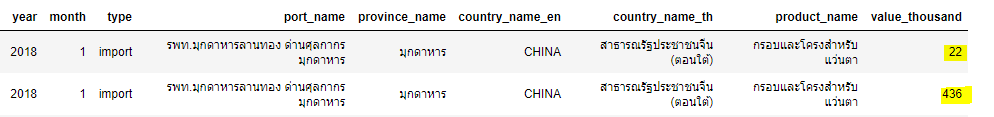

>จากภาพตัวอย่างจะพบว่ามีข้อมูลซ้ำกันบางคอลัมน์ ผู้จัดทำจึงจะทำการรวมเป็นเเถวเดียวเพื่อง่ายต่อการจัดการข้อมูลมากขึ้น

>*ภาพตัวอย่างหลังจากรวมข้อมูลเเล้ว* ซึ่งจากภาพผลลัพธ์จะเป็นการรวมกันของราคาสินค้ากรอบเเละโครงเเว่นสำหรับเเว่นตา จากการนำเข้าจากแหล่งเดียวกัน ดังภาพ
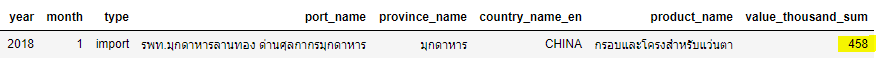

>โดยกระบวนการในการจัดการค่าซ้ำซ้อนมี 
><ul><li>หาผลรวมมูลค่าของเเต่ละรายการเเถวข้อมูลที่ซ้ำกัน โดยหาผลรวม มูลค่านำเข้าหรือส่งออก ที่เป็นข้อมูลในปีเดียว เดือนเดียวกัน ประเภทการค้า ด่านที่ผ่านการค้า จังหวัด 
เเละประเทศของข้อมูล เพื่อหาผลรวมของเเต่ละรายการสินค้า</li><li>นำข้อมูลหลังจากรวมราคาสินค้าเข้า DataFrame</li></ul>

#### หาผลรวมมูลค่าของเเต่ละรายการเเถวข้อมูลที่ซ้ำกัน

In [22]:
# ใช้ Group by ในการเเบ่งรายการเเถวข้อมูล โดยใช้ aggregate 'sum' เพื่อรวมค่าของราคาสินค้านั้นๆ 
grouped_data = data.groupby(['year', 'month','type','port_name','province_name','country_name_en','product_name']).agg({'value_thousand':['sum']})
grouped_data.iloc[10:20] # เเสดงผลลัพธ์

value_thousand
                                                                                                                             sum
year month type   port_name                  province_name country_name_en product_name                                         
2018 1     export ด่านศุลกากรสะเดา (ศภ.4)    สงขลา         SINGAPORE       กระดาษชำระ กระดาษเช็ดหน้า กระดาษอนามัย              6
                                                                           กระดาษแข็ง                                         12
                                                                           กระดาษและผลิตภัณฑ์กระดาษอื่นๆ                     305
                                                                           กระเป๋าถือ                                         72
                                                                           กระเป๋าเดินทาง                                     79
                                                                           กระเป๋าใส่เศษสตางค์                                 8
                                                                           กล่องหีบที่ทำด้วยพลาสติก                         2419
                  ด่านศุลกากรเชียงของ (ศภ.3) เชียงราย      CHINA           กระดาษชำระ กระดาษเช็ดหน้า กระดาษอนามัย           1103
                                                                           กระติกสูญญากาศและส่วนประกอบ                        36
                                                                           กล่องหีบที่ทำด้วยพลาสติก                            2

#### นำข้อมูลหลังจากรวมราคาสินค้าเข้า DataFrame

In [23]:
grouped_data.columns = ['value_thousand_sum'] # ตั้งชื่อ column value_thousand ใหม่ เป็น value_thousand_sum เป็น column ที่หมายถึงมูลค่ารวมของสินค้านั้นๆที่มีคอลัมน์อื่นๆ เหมือนกัน
grouped_data = grouped_data.reset_index() #reset index เพื่อเริ่มต้นนับ index หลังจากการแปลงข้อมูลเก่า เป็นข้อมูลใหม่
data_use = pd.DataFrame(grouped_data) # นำข้อมูลที่เกิดจากการรวมมูลค่าสินค้าเป็น DataFrameเเละเก็บใน DataFrame ชื่อตัวแปร data_use
data_use.head(10)  # เเสดงผลลัพธ์

#เมื่อเเสดงผลลัพธ์จะพบว่า จำนวนเเถวของข้อมูลจะลดลงเหลือ 1970 เเถวข้อมูลเนื่องจาก มีการรวบรวมข้อมูลที่เหมือนกันในทุกๆ คอลัมน์ 
#ยกเว้น คอลัมน์ product_name เเละ value_baht เพื่อทราบผลว่าสินค้าที่มาจากประเทศเดียวกันในเดือนเดียวกันนั้นมีมูลค่าเป็นเท่าใด

,year,month,type,port_name,province_name,country_name_en,product_name,value_thousand_sum
0,2018,1,export,ด่านศุลกากรนครพนม (ศภ.2),นครพนม,VIETNAM,กระจกนิรภัย กระจกรถยนต์,86
1,2018,1,export,ด่านศุลกากรนครพนม (ศภ.2),นครพนม,VIETNAM,กล่องหีบที่ทำด้วยพลาสติก,908
2,2018,1,export,ด่านศุลกากรปาดังเบซาร์ 3(ศภ.4),สงขลา,SINGAPORE,กล่องหีบที่ทำด้วยพลาสติก,341
3,2018,1,export,ด่านศุลกากรมุกดาหาร (ศภ.2),มุกดาหาร,VIETNAM,กระจกนิรภัย กระจกรถยนต์,45
4,2018,1,export,ด่านศุลกากรมุกดาหาร (ศภ.2),มุกดาหาร,VIETNAM,กระดาษชำระ กระดาษเช็ดหน้า กระดาษอนามัย,2520
5,2018,1,export,ด่านศุลกากรมุกดาหาร (ศภ.2),มุกดาหาร,VIETNAM,กระดาษและผลิตภัณฑ์กระดาษอื่นๆ,248
6,2018,1,export,ด่านศุลกากรมุกดาหาร (ศภ.2),มุกดาหาร,VIETNAM,กระดาษใช้สำหรับเขียน พิมพ์ หรือวัตถุประสงค์อื่...,160
7,2018,1,export,ด่านศุลกากรมุกดาหาร (ศภ.2),มุกดาหาร,VIETNAM,กล่องหีบที่ทำด้วยพลาสติก,98
8,2018,1,export,ด่านศุลกากรมุกดาหาร (ศภ.2),มุกดาหาร,VIETNAM,ก๊อก วาวล์และส่วนประกอบ,538
9,2018,1,export,ด่านศุลกากรสะเดา (ศภ.4),สงขลา,SINGAPORE,กระจกนิรภัย กระจกรถยนต์,130


### รวม Column ระหว่าง month and year 
>จากผลลัพธ์ สามารถรวม year เเละ month เก็บไว้อีกหนึ่งคอลัมน์ ชื่อว่า date โดยการ map column year เเละ month สำหรับ dataframe ชื่อ Date_use <br> เข้าด้วยกัน เพื่อการวิเคราะห์เเละเเสดงผลได้ง่ายขึ้น

In [24]:
data_use['date'] = data_use['year'].map(str)+ '-' +data_use['month'].map(str) # ตั้งคอลัมน์เพื่อรวมข้อมูลปีเเละเดือนไว้ด้วยกันโดยมี - ขั้นกลาง
data_use['date'] = pd.to_datetime(data_use['date'], format='%Y-%m').dt.strftime('%Y-%m') # นำคอลัมน์ใหม่เข้าสู่ dataFrame ในรูปแบบวันที่ที่มี format เป็น ปีเเละเดือน 
data_use.head() #เเสดงผลข้อมูลโดยคอลัมน๋ date ข้อมูลเเรกเป็นปี-เดือน ตามลำดับ

,year,month,type,port_name,province_name,country_name_en,product_name,value_thousand_sum,date
0,2018,1,export,ด่านศุลกากรนครพนม (ศภ.2),นครพนม,VIETNAM,กระจกนิรภัย กระจกรถยนต์,86,2018-01
1,2018,1,export,ด่านศุลกากรนครพนม (ศภ.2),นครพนม,VIETNAM,กล่องหีบที่ทำด้วยพลาสติก,908,2018-01
2,2018,1,export,ด่านศุลกากรปาดังเบซาร์ 3(ศภ.4),สงขลา,SINGAPORE,กล่องหีบที่ทำด้วยพลาสติก,341,2018-01
3,2018,1,export,ด่านศุลกากรมุกดาหาร (ศภ.2),มุกดาหาร,VIETNAM,กระจกนิรภัย กระจกรถยนต์,45,2018-01
4,2018,1,export,ด่านศุลกากรมุกดาหาร (ศภ.2),มุกดาหาร,VIETNAM,กระดาษชำระ กระดาษเช็ดหน้า กระดาษอนามัย,2520,2018-01


## savefile หลังจากทำความสะอาดข้อมูลเเล้ว 
>เพื่อเก็บเป็นข้อมูลสำหรับไปใช้เฉพาะในการวิเคราะห์ในโอกาศหน้า หรือไว้ใช้ในกรณีอื่นๆ 

In [25]:
#save file_clean to folder data
data_after_clean = data_use.to_csv('Data\data_after_cleann.csv',index=False, encoding="utf-8")# โดยตั้งชื่อไฟล์หลังจากทำความสะอาดข้อมูลเเล้วเป็น file data_after_clean

### เเสดงข้อมูลที่จะใช้ในการวิเคราะห์ต่อไป

In [26]:
# เเสดงข้อมูลใน data_use เนื่องจากข้อมูลนี้จะเป็นข้อมูลในการนำมาวิเคราะห์เเละเเสดงผลต่อไป
data_use 
# จากผลลัพธ์มีจำนวนข้อมูลล่าสุดที่ 2029 เเถวข้อมูล

,year,month,type,port_name,province_name,country_name_en,product_name,value_thousand_sum,date
0,2018,1,export,ด่านศุลกากรนครพนม (ศภ.2),นครพนม,VIETNAM,กระจกนิรภัย กระจกรถยนต์,86,2018-01
1,2018,1,export,ด่านศุลกากรนครพนม (ศภ.2),นครพนม,VIETNAM,กล่องหีบที่ทำด้วยพลาสติก,908,2018-01
2,2018,1,export,ด่านศุลกากรปาดังเบซาร์ 3(ศภ.4),สงขลา,SINGAPORE,กล่องหีบที่ทำด้วยพลาสติก,341,2018-01
3,2018,1,export,ด่านศุลกากรมุกดาหาร (ศภ.2),มุกดาหาร,VIETNAM,กระจกนิรภัย กระจกรถยนต์,45,2018-01
4,2018,1,export,ด่านศุลกากรมุกดาหาร (ศภ.2),มุกดาหาร,VIETNAM,กระดาษชำระ กระดาษเช็ดหน้า กระดาษอนามัย,2520,2018-01
...,...,...,...,...,...,...,...,...,...
2024,2020,8,import,ด่านศุลกากรสะเดา (ศภ.4),สงขลา,VIETNAM,เครื่องคอมพิวเตอร์และอุปกรณ์,475,2020-08
2025,2020,8,import,ด่านศุลกากรหนองคาย (ศภ.2),หนองคาย,CHINA,กระจก แก้ว และผลิตภัณฑ์อื่น ๆ,17,2020-08
2026,2020,8,import,ด่านศุลกากรอรัญประเทศ (ศภ.1),สระแก้ว,VIETNAM,คอนแทกเลนซ์และเลนส์,82504,2020-08
2027,2020,8,import,รพท.มุกดาหารลานทอง ด่านศุลกากรมุกดาหาร,มุกดาหาร,CHINA,กรอบและโครงสำหรับแว่นตา,1355,2020-08


## วิเคราะห์เเละเเสดงผลข้อมูล โดย การ plot Graph หรือเเสดงผลลัพธ์ตารางข้อมูล
>โดยชื่อตัวแปรที่ใช้ในการเเสดงผลข้อมูลนั้นคือ data_use เป็นข้อมูลล่าสุดหลังจากทำความสะอาดข้อมูลเเล้ว

### 1. ตรวจสอบปริมาณการนำเข้า เเละ ส่งออกสินค้า 

> โดยมีรูปแบบต่างๆ ในการเเสดงผลดังนี้  
><ul><li>เเสดงสินค้าส่งออกของไทยส่งออกไปประเทศใดมากกว่ากันเเละสินค้านำเข้า นำเข้าจากประเทศใดมากที่สุด</li><li>เปรียบเทียบจำนวนข้อมูล หรือปริมาณการนำเข้า เเละ ส่งออกในเเต่ละปี</li><li>เเสดงมูลค่าของการส่งออก เเละนำเข้า ในเเต่ละปี โดยมีหน่วยเป็นพันบาท</li><li> เเสดงมูลค่าสินค้าตามช่วงต่างๆ ในการนำเข้าเเละส่งออก</li><li> เเสดงมูลค่าการนำเข้าในเเต่ละเดือน</li><li>  เเสดงมูลค่าการส่งออกในเเต่ละเดือน</li><li> เเสดง Timeline ในการนำเข้าเเละส่งออกสินค้า</li></ul>


#### 1.1 เเสดงสินค้าส่งออกของไทยเพื่อดูว่าส่งออกไปประเทศใดมากกว่ากันเเละสินค้านำเข้า นำเข้าจากประเทศใดมากที่สุด

Text(0, 0.5, 'Percentage')

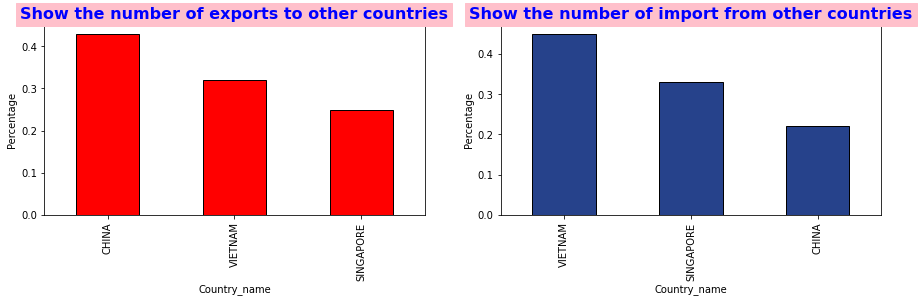

In [27]:
# ตรวจสอบว่าสินค้าส่งออกของไทยส่งออกไปไหนมากกว่ากันเเละสินค้านำเข้า นำเข้าจากประเทศใดมากที่สุด

fig = plt.figure(figsize=(15,3.5)) # กำหนดหน้าต่างเเสดงผลลัพธ์ในการ plot graph 
plt.subplot(1,2,1) # เเสดงในกราฟที่ 1 
'''เลือกเฉพาะข้อมูลสินค้าส่งออก โดยนับว่ามีจำนวนข้อมูลเท่าใดของเเต่ละประเทศมา plot graph ชนิด Bar Graph
พร้อมกำหนดสีเเละเส้นขอบของกราฟด้วย โดยใช้ normalize เพื่อเเสดงเป็น %'''
data_use[data_use['type'] == 'export'].country_name_en.value_counts(normalize=True).plot(kind='bar', 
                                                                                         color = 'r',edgecolor='black') 
plt.title("Show the number of exports to other countries",weight='bold', fontsize=16, 
          color="blue",backgroundcolor='pink'); #ตั้งชื่อกราฟ
plt.xlabel("Country_name") # กำหนดชื่อเเกน x ของกราฟ
plt.ylabel("Percentage") # กำหนดชื่อเเกน y ของกราฟ


plt.subplot(1,2,2) # เเสดงในกราฟที่ 2 
'''เลือกเฉพาะข้อมูลสินค้านำเข้า โดยนับว่ามีจำนวนข้อมูลเท่าใดของเเต่ละประเทศ มาplot graph ชนิด Bar Graph
พร้อมกำหนดสีเเละเส้นขอบของกราฟด้วย โดยใช้ normalize เพื่อเเสดงเป็น %'''
data_use[data_use['type'] == 'import'].country_name_en.value_counts(normalize=True).plot(kind='bar', 
                                                                                         color = '#26428b',edgecolor='black') 
plt.title("Show the number of import from other countries", weight='bold',fontsize=16, 
          color="blue",backgroundcolor='pink') #ตั้งชื่อกราฟ
plt.xlabel("Country_name") # กำหนดชื่อเเกน x ของกราฟ
plt.ylabel("Percentage") # กำหนดชื่อเเกน y ของกราฟ


**อธิบายผลลัพธ์** <br>
จากผลลัพธ์จะพบว่าสินค้าที่ไทยส่งออกไปมากที่สุดคือประเทศ จีน อยู่ที่ 43% เวียดนาม 32% เเละ สิงค์โปร์ 25% ตามลำดับ <br>
เเละสินค้าจากประเทศที่ไทยนำเข้าไปมากที่สุดคือประเทศ เวียดนาม อยู่ที่ 45%  singapore 33% เเละ จีน 22% ตามลำดับ
<br> <li> ดังนั้นทำให้ผู้จัดทำรู้ได้ว่า จีนมีบทบาทอย่างมากในการส่งออกสินค้าของไทย หรือเป็นประเทศที่มีผลต่อเศรษฐกิจของไทยมากกว่าประเทศอื่นๆอีก 2 ประเทศ  </li>
____________________________________________________________________________________________________

#### 1.2 เปรียบเทียบจำนวนข้อมูล หรือปริมาณการนำเข้า เเละ ส่งออกในเเต่ละปี 
*ซึ่งจากผลลัพธ์จะทำให้ผู้จัดทำทราบได้ว่า ใน 3 ปีที่ผ่านมาประเทศไทยมีการนำเข้าหรือส่งออกเป็นปริมาณเท่าใด ส่งออกหรือนำเข้ามากกว่ากัน*

Text(0, 0.5, 'Number of imports and exports')

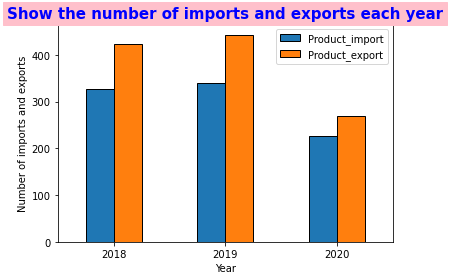

In [28]:
# ตรวจสอบว่าเเต่ละปีมีการส่งออกสินค้ามากน้อยเพียงใด
Product_import = data_use[data_use.type == 'import'].year.value_counts() #นับจำนวนข้อมูลสินค้านำเข้าทั้งหมดในเเต่ละปี
Product_export = data_use[data_use.type == 'export'].year.value_counts() #นับจำนวนข้อมูลสินค้าส่งออกทั้งหมดในเเต่ละปี
index = [2018,2019,2020] # ตั้ง index ในเเนวเเกน x เป็นในเเต่ละปีของข้อมูล

#นำค่าของจำนวนสินค้านำเข้าเเละส่งออกเข้า dataframe
df = pd.DataFrame({'Product_import': Product_import,'Product_export': Product_export}, index=index) 
df.plot.bar(rot=0,edgecolor='black') # plot graph เพื่อเเสดงผลลัพธ์ 
plt.title("Show the number of imports and exports each year",weight='bold', fontsize=15, 
          color="blue",backgroundcolor='pink') #เเสดงชื่อกราฟ
plt.xlabel("Year") # ชื่อค่าของเเกน x ในที่นี้คือ year
plt.ylabel('Number of imports and exports')  # ค่าของเเกน y ในที่นี้คือจำนวนสินค้านำเข้าเเละส่งออก

**อธิบายผลลัพธ์** <br>
จะพบว่าเมื่อเปรียบเทียบการนำเข้าเเละส่งออกสินค้าเเล้วปรากฏว่า ประเทศไทยนั้น ส่งออกสินค้ามากกว่าการนำเข้าสินค้า ในทุกๆปีเป็นส่วนใหญ่<br> 
หรือบอกได้ว่าประเทศไทยนั้น มีอัตราการส่งออกมากกว่าการนำเข้าสินค้าเข้ามาทั้ง 3 ปี [2018 2019 2020] บ่งบอกถึงว่าประเทศเรามีสินค้าที่หลากหลาย <br> เเละต่างประเทศต้องการอยู่เป็นจำนวนมากอีกทั้งการส่งออกสินค้าก็เป็นตัวขับเคลื่อนเศรษฐกิจของไทยได้ 
____________________________________________________________________________________________________________________________

#### 1.3 เเสดงมูลค่าของการส่งออก เเละนำเข้า ในเเต่ละปี โดยมีหน่วยเป็นพันบาท
ซึ่งมีกระบวนการในการวิเคราะห์ดังนี้
<ul>
<li>เเสดงตารางผลลัพธ์มูลค่ารวมของรายการสินค้านำเข้า เเละ สินค้าส่งออก 
</li>
<li>แปลงตารางผลลัพธ์ข้อมูลโดยเเบ่งเเยกตามรายการสินค้านำเข้า เเละ ส่งออก</li>
<li>นำผลลัพธ์จากตาราง มา plot Pie Graph  </li>
</ul>

#### <ul><li>เเสดงตารางผลลัพธ์มูลค่ารวมของรายการสินค้านำเข้า เเละ สินค้าส่งออก</li></ul>
> โดยการนับผลรวมมูลค่าสินค้าในหน่วยพันบาทของเเต่ละปี หรือ (value_thousand_baht) ในการส่งออกหรือนำเข้าสินค้า เพื่อดูมูลค่าทั้งหมด ในเเต่ละปี <br> เช่น จากผลลัพธ์ในปี 2018 ไทยส่งออกสินค้าได้เงินมูลค่าประมาณ 3,509,882,000 บาท  

In [29]:
# เก็บข้อมูลจากการนับผลรวมมูลค่าสินค้าโดยเเบ่งตาม type เเละ year ไว้ใน DataFrame
data_sum_imex = pd.DataFrame(data_use.groupby(['type', 'year']).value_thousand_sum.sum()) 
data_sum_imex # เเสดงตารางข้อมูลรวมของมูลค่าสินค้าในเเต่ละปี เเต่ละประเภท

value_thousand_sum
type   year                    
export 2018             3509882
       2019             9507396
       2020            19329047
import 2018             1140875
       2019             1647848
       2020             2024939

#### <ul><li>แปลงตารางผลลัพธ์ข้อมูลโดยเเบ่งเเยกตามรายการสินค้านำเข้า เเละ ส่งออก</li></ul>
   >โดยทำการเเยกข้อมูลระหว่าง มูลค่าทั้งหมดของสินค้านำเข้า เเละ ส่งออก เพื่อใช้ในการ plot graph ได้ง่ายขึ้น <br>
    โดยเริ่มจากการเก็บข้อมูลเเยกระหว่างสินค้านำเข้า เเละ สินค้าส่งออก จากนั้นจะนำทั้งสองตัวมาต่อเชื่อมกันด้วย concat เเละเเสดงผลโดยมี index คือ year

In [30]:
#เก็บผลรวมมูลค่าของสินค้านำเข้าเเละส่งออกในเเต่ละปี
data_sum_im = pd.DataFrame(data_use[data_use['type'] == 'import'].groupby('year').value_thousand_sum.sum()) # นำเข้า
data_sum_ex = pd.DataFrame(data_use[data_use['type'] == 'export'].groupby('year').value_thousand_sum.sum()) # ส่งออก
# นำผลรวมมูลค่าสินค้านำเข้าเเละส่งออกมาต่อกัน เพื่อ plot graph ได้ในคราวเดียว โดยข้อมูลเเรก จะเป็นของนำเข้า เเละ ส่งออก ตามลำดับ
data_sum = pd.concat([data_sum_im, data_sum_ex],axis=1) 
data_sum # เเสดงผล

,value_thousand_sum,value_thousand_sum
year,,
2018,1140875,3509882
2019,1647848,9507396
2020,2024939,19329047


In [31]:
#เปลี่ยนชื่อ column เพื่อความเข้าใจมากขึ้น 
value_imex = ['value_import', 'value_export']  # ตั้งตัวแปรที่จะเปลี่ยนชื่อ column
data_sum.columns = value_imex # เปลี่ยนชื่อ column จาก value_thousand_sum เป็น มูลค่าของ import เเละ export เพื่อกันความสับสน
data_sum # เเสดงผลข้อมูล 

,value_import,value_export
year,,
2018,1140875,3509882
2019,1647848,9507396
2020,2024939,19329047


#### <ul><li>นำผลลัพธ์จากตาราง มา plot Pie Graph</li></ul>
-plot pie graph เพื่อเเสดงถึงสัดส่วนของมูลค่าเงินในการนำเข้าเเละส่งออกสินค้าเเต่ละปี เพื่อใช้ในการเปรียบเทียบมูลค่าสินค้าในเเต่ละปีได้ชัดเจนมากยิ่งขึ้น <br> รวมถึงเเสดง % ที่ได้ในเเต่ละปีด้วย 

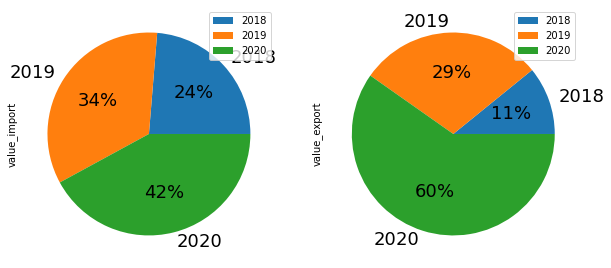

In [32]:
# นำข้อมูลที่ได้ concat ไว้ มา plot pie โดยกำหนด ให้มี % ข้อมูลด้วย
data_sum.plot.pie(subplots=True,autopct='%.0f%%', figsize=(10, 8),fontsize=18)  
plt.legend(loc='upper right') # ตั้ง legend ของกราฟให้อยู่ทางด้านบนขวาของกราฟ


**อธิบายผลลัพธ์** <br>
จากกราฟจะเเสดงมูลค่าโดยรวมในเเต่ละปี ตั้งเเต่ปี 2018 - 2020 เพื่อดูว่าปีใดมีมูลค่าการส่งออก นำเข้า มากที่สุด <br>
- พบว่ามูลค่าในการนำเข้าสินค้า ปี 2020 มีสัดส่วนมากที่สุด 42% ตามด้วยปี 2019 34% เเละ 2018 24% ตามลำดับ ซึ่งอาจวิเคราะห์ได้ว่า ในปีหน้า ไทยอาจมีมูลค่า<br>ในการนำเข้าสินค้าเพิ่มมากขึ้นเรื่อยๆ <br>
- เเละสำหรับสินค้าส่งออกของไทยพบว่า มูลค่าในปี 2020 มีสัดส่วนที่มากที่สุด 60% ตามด้วยปี 2019 29% เเละปี 2018 11% ตามลำดับ กล่าวคือ มูลค่าการส่งออก<br>ของไทยเพิ่มขึ้นเรื่อยๆ ในเเต่ละปี โดยในปี 2020 จะมีมูลค่าเพิ่มขึ้นอย่างเห็นได้ชัด อาจจะมาจากรายการสินค้ากลุ่มเทคโนโลยี เนื่องจากถึงเเม้ว่าปีนี้จะพบเจอกับ<br>สถานการณ์โควิด เเต่สินค้าที่ยังคงขายได้ดี ก็จะเป็นกลุ่มสินค้าทางด้านเทคโนโลยี เป็นต้น ซึ่งถือเป็นข้อสมมติฐานเบื้องต้นในการวิเคราะห์ครั้งนี้ 

#### 1.4 เเสดงมูลค่าสินค้าตามช่วงต่างๆ ในการนำเข้าเเละส่งออก
> เพื่อเเสดงว่ามูลค่าส่วนใหญ่จะอยู่ที่เท่าใดในเเต่ละรายการสินค้า หรือในเเต่ละปี มีจำนวนมูลค่าสินค้าเท่าใดบ้าง ช่วยเป็นเเนวทางในการเปรียบเทียบสถานการณ์ก่อนเกิดโควิดเเละหลังเกิด

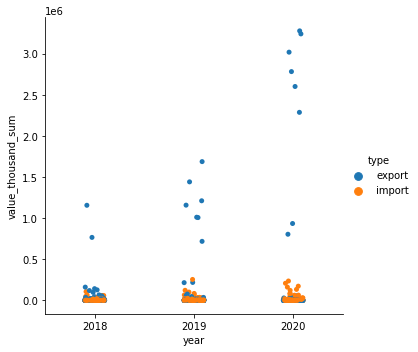

In [33]:
# ใช้ fn catplot ของ sns ในการ plot Graph โดยกำหนดให้เเกน x เป็นปีเเต่ละปี เเกน y เป็นมูลค่าสินค้า โดยมี type เป็นตัวชี้วัด
sns.catplot(x="year", y="value_thousand_sum", hue="type" , data=data_use)
# โดยที่ในเเน y 1e6 = หน่วย 1,000,000 

**อธิบายผลลัพธ์**
- จากผลลัพธ์ด้านบนจะทำให้เห็นภาพได้ชัดเจนมากขึ้นในเรื่องของมูลค่าเงิน ในการส่งออกสินค้าของไทย ซึ่งจำนวนมูลค่าเงินในการส่งออกสินค้าของไทยไปยังประเทศต่างๆ 
มีจำนวนส่วนใหญ่ที่มากกว่าการนำเข้าสินค้าจากประเทศอื่นๆเข้ามา เมื่อเปรียบเทียบในเเต่ละปี จะพบว่าปี 2020 จะมีมูลค่าสูงกว่าปีอื่นๆทั้งๆที่ช่วงต้นเดือนของปีนั้นประสบกับปัญหา
โควิด หรืออาจกล่าวได้ว่า สินค้าจำพวกที่ให้มูลค่าสูงส่วนมีเเนวโน้มจะมาจากสินค้าเกษตรหรืออาหาร เนื่องจากไทยเป็นประเทศที่มีชื่อเสียงเเละเป็นที่ยอมรับด้านนี้ รวมถึงสินค้าจำพวกกลุ่มเทคโนโลยี คอมพิวเตอร์ต่างๆ ที่เป็นที่ต้องการมากขึ้นเพื่อรองรับสำหรับ Social Distancing เป็นต้น เพราะหากดูจากกราฟจะเห็นว่าปี 2020 จะมีมูลค่าการส่งออกที่โดดขึ้นมาจากปีก่อนๆ อย่างชัดเจน 

#### 1.5 เเสดงมูลค่าการนำเข้าสินค้าในเเต่ละเดือน
>เเสดงจำนวนมูลค่าตามช่วงเวลาในเเต่ละปีโดยจะเเสดงเป็นรายเดือนเพื่อวิเคราะห์ว่าใน 1 ปี เดือนใดมีมูลค่าการนำเข้าสินค้าเข้ามามากที่สุด <br> ซึ่งหากทราบเเล้วอาจจะนำข้อมูลเหล่านี้มาเป็นตัวตัดสินใจให้กับการวางเเผนขายสินค้ากับผู้ประกอบการต่างๆ เนื่องจากข้อมูลอาจสรุปคร่าวๆ ได้ว่า ช่วงเวลาที่มีมูลค่าของการนำเข้าสินค้ามากอาจเป็นช่วงเวลาที่ผู้คนสนใจในสินค้านั้นๆ หรือ ซื้อของออนไลน์กันมากขึ้น ซึ่งจากตรงนี้หากเราดูว่าสินค้าที่ให้มูลค่ามากสุดในเดือนดังกล่าวคืออะไร ก็จะเป็นเเนวทางที่ดีในการทำธุรกิจต่อไปได้ เป็นต้น

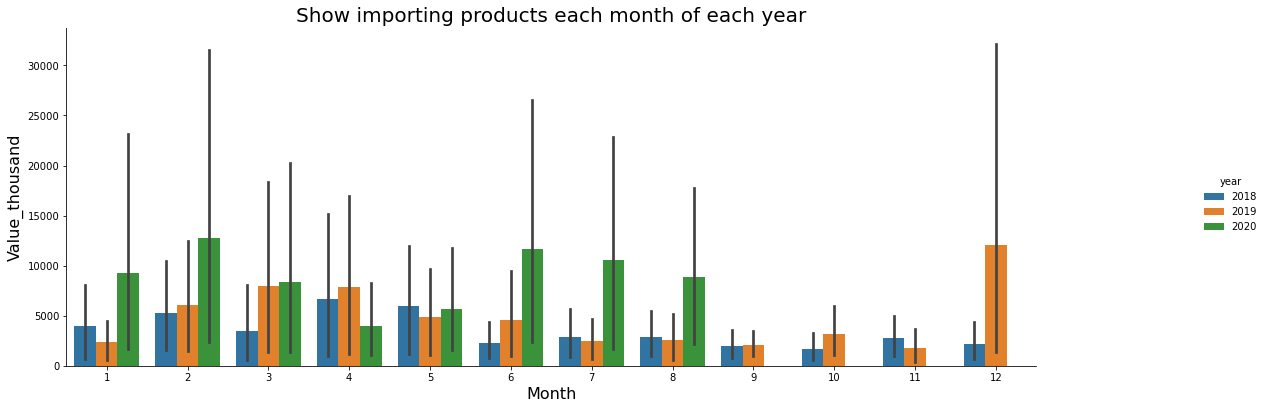

In [34]:
# เเสดงมูลค่าการนำเข้าสินค้าของปี 2018 2019 2020 ในเเต่ละเดือน
data_impot = data_use['type'] =='import' #ตั้งเงื่อนไขสำหรับเลือกข้อมูลเฉพาะ type เป็นสินค้าที่นำเข้ามา
data_im = data_use[(data_impot)] # เก็บข้อมูลที่ตรงกับเงื่อนไขด้านบน เข้าตัวแปร data_im
#plot Graph โดยใช้ sns แบบ bar graphโดยกำหนด x = เดือน y = มูลค่าสินค้า โดยเเยกสีตามเเต่ละปี 
snsplot = sns.catplot(x="month", y="value_thousand_sum", hue="year",kind='bar', data=data_im)
plt.title('Show importing products each month of each year', fontsize=20) # ตั้งชื่อกราฟ 
plt.xlabel('Month', fontsize=16) # เเสดง label ในเเกน x คือ Month 
plt.ylabel('Value_thousand', fontsize=16)  # เเสดง label ในเเกน y คือ value_thousand 
# กำหนดขนาดหน้าต่างกราฟ ด้วยความกว้างเเละความสูง
snsplot.fig.set_figwidth(20.27) 
snsplot.fig.set_figheight(5.5)

**อธิบายผลลัพธ์**
- จากผลลัพธ์ จะเเสดงถึงมูลค่าสินค้าในเเต่ละเดือนโดยมูลค่าสินค้าส่วนใหญ่จะอยู่ตามสีของ bar กราฟ เเละขีดที่ยาวขึ้นไปจะเเสดงค่ามากที่สุดที่มีอยู่ในปีนั้นๆ <br>ซึ่งเมื่อพิจารณาดูเเล้วจะพบว่าในเดือนที่ 4
หรือเดือนเมษายน การนำเข้าสินค้าในปี 2018 เเละ 2019 จะอยู่ในระดับที่คงที่หรือไล่เลี่ยกัน ซึ่งต่างจากปี 2020 ที่มีมูลค่าในการนำเข้า ลดลงอย่างเห็นได้ชัด<br> นั่นอาจเป็นผลจากสถานการณ์โควิด ที่มีการเเพร่ระบาดอย่างรุนเเรงในช่วงเดือนมีนาคม เมษายน เเละ พฤษภาคม ไทยจึงชะงักในเรื่องของสินค้านำเข้าลง ดังกราฟ เพื่อลดโอกาสเสี่ยงในการนำเชื้อเข้าสู่ประเทศ อีกทั้งยังประเทศเพื่อนบ้านก็อาจเกิดวิกฤตกับการส่งออกสินค้าด้วยเช่นกัน เเต่เมื่อสถานการณ์เริ่มฟื้นตัว การนำเข้าสินค้าในปีนี้ก็มีมูลค่าเพิ่มขึ้นเรื่อยๆ สาเหตุอาจมาจากในช่วงที่เกิดการเเพร่ระบาดนั้น ไม่มีการขับเคลื่อนเศรษฐกิจ หรือผลิตสินค้าต่างๆได้ จึงทำให้ไทยนำเข้าสินค้าในช่วงเวลานี้เป็นมูลค่าจำนวนมาก  

#### 1.6 เเสดงมูลค่าการส่งออกสินค้าในเเต่ละเดือน
>เเสดงจำนวนมูลค่าตามช่วงเวลาในเเต่ละปีโดยจะเเสดงเป็นรายเดือนเพื่อวิเคราะห์ว่าใน 1 ปี การส่งออกของไทยในช่วงใดบ้างที่โดดเด่น เเละมีมูลค่ามากกว่าเดือนอื่นๆ เป็นต้น 

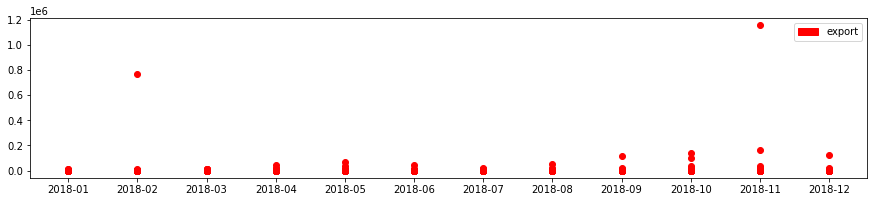

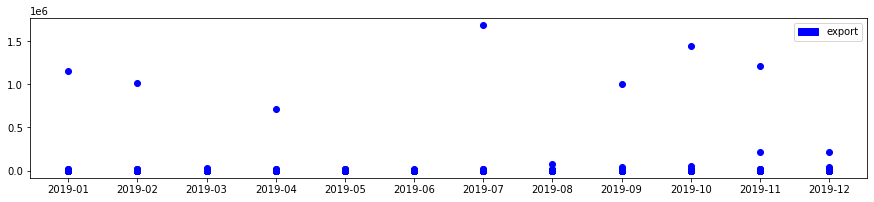

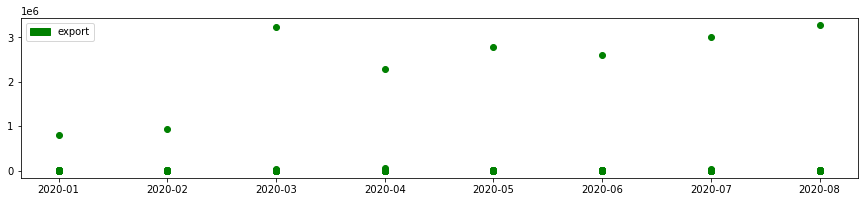

In [35]:
# มูลค่าการส่งออกสินค้าในปี 2018
fig= plt.figure(figsize=(15,10))  # กำหนดหน้าต่างเเสดงผลลัพธ์ในการ plot graph 
plt.subplot(3,1,1) # กำหนดตำแหน่งให้เเสดงในเเถวที่ 1 จากจำนวน 3 เเถว 1 คอลัมน์ 
red_patch = mpatches.Patch(color='red', label='export') # ตั้ง legend เพื่อความเข้าใจในการอ่านกราฟ
plt.legend(handles=[red_patch]) #เเสดง legend ของกราฟที่ 1 คือ export

# กำหนดเงื่อนไขโดยเลือกเฉพาะข้อมูลสินค้าส่งออกเฉพาะในปี 2018 
condition_1 = data_use['year'] == 2018
condition_2 = data_use['type'] =='export'
data_month18 = data_use[ (condition_1) & (condition_2)] # เรียกใช้ข้อมูล data_use ที่มีเฉพาะสินค้าส่งออกในปี 2018

# plot Graph เเสดงมูลค่าสินค้าในเเต่ละเดือนของปี 2018 โดยใช้ข้อมูลที่ได้ตั้งเงื่อนไขไว้ 
plt.plot_date(data_month18['date'], data_month18['value_thousand_sum'] ,color='r',label='export') 
plt.show() ## เเสดงมูลค่ารายการส่งออกในปี 2018 
# --------------------------------------------------------------------------------------------------------------
# มูลค่าการส่งออกสินค้าในปี 2019
fig= plt.figure(figsize=(15,10)) # กำหนดหน้าต่างเเสดงผลลัพธ์ในการ plot graph 
plt.subplot(3,1,2) # กำหนดตำแหน่งให้เเสดงในเเถวที่ 2 จากจำนวน 3 เเถว 1 คอลัมน์ 
blue_patch = mpatches.Patch(color='blue', label='export') # ตั้ง legend เพื่อควาวมเข้าใจในการอ่านกราฟ
plt.legend(handles=[blue_patch]) #เเสดง legend ของกราฟที่ 2 
# กำหนดเงื่อนไขโดยเลือกเฉพาะข้อมูลสินค้าส่งออกเฉพาะในปี 2019
condition_1 = data_use['year'] == 2019
condition_2 = data_use['type'] =='export'
data_month19 = data_use[ (condition_1) & (condition_2)]

# plot Graph เเสดงมูลค่าสินค้าในเเต่ละเดือนของปี 2019 โดยใช้ข้อมูลที่ได้ตั้งเงื่อนไขไว้ 
plt.plot_date(data_month19['date'], data_month19['value_thousand_sum'],color='b',label='export')
plt.show() ## เเสดงมูลค่ารายการส่งออกในปี 2019
# -----------------------------------------------------------------------------------------------------------------
# มูลค่าการส่งออกสินค้าในปี 2020
fig= plt.figure(figsize=(15,10)) # กำหนดหน้าต่างเเสดงผลลัพธ์ในการ plot graph 
plt.subplot(3,1,3) # กำหนดตำแหน่งให้เเสดงในเเถวที่ 3 จากจำนวน 3 เเถว 1 คอลัมน์ 
green_patch = mpatches.Patch(color='green', label='export') # ตั้ง legend เพื่อควาวมเข้าใจในการอ่านกราฟ
plt.legend(handles=[green_patch]) #เเสดง legend ของกราฟที่ 3 
# กำหนดเงื่อนไขโดยเลือกเฉพาะข้อมูลสินค้าส่งออกเฉพาะในปี 2020
condition_1 = data_use['year'] == 2020
condition_2 = data_use['type'] =='export'
data_month20 = data_use[ (condition_1) & (condition_2)]

# plot Graph เเสดงมูลค่าสินค้าในเเต่ละเดือนของปี 2020 โดยใช้ข้อมูลที่ได้ตั้งเงื่อนไขไว้ 
plt.plot_date(data_month20['date'], data_month20['value_thousand_sum'],color='g',label='export')
plt.show() ## เเสดงมูลค่ารายการส่งออกในปี 2020

**อธิบายผลลัพธ์** <br>
- จากกราฟจะช่วยให้ผู้จัดทำมองภาพมูลค่าข้อมูลส่วนใหญ่ในเเต่ละเดือนได้ง่ายขึ้น เช่น เมื่อเทียบในปี 2018 2019 เเละ 2020 จะพบว่าทั้งสามปีมูลค่าสินค้าส่วนใหญ่จะไม่เกิน 500,000 (หน่วยพันบาท) เเต่ที่เเตกต่างคือจะมีสินค้าบางกลุ่มที่โดดเด่นกว่าสินค้าอื่นๆ คือมีมูลค่าสินค้าในการส่งออกมากที่สุด โดยเริ่มจากปี 2018 อยู่ในระดับ 1ล้าน (หน่วยพันบาท) ปี 2019 มูลค่าไปถึง 1.5 ล้าน (หน่วยพันบาท) เเละปี 2020 มูลค่าสินค้าได้ถึง 3 ล้านกว่า (หน่วยพันบาท) โดยเพิ่มขึ้นเรื่อยๆ ในเเต่ละปี

#### 1.7 Show timeline for importing and exporting products
โดยกระทำดังนี้  <ul><li>ใช้เครื่องมือ pivot_table เพื่อสรุปข้อมูล</li><li>นำผลลัพธ์ที่ได้มาเเสดงกราฟเพื่อมองได้ง่ายมากขึ้น</li></li></ul>
>โดยกราฟด้านล่างนี้จะ เเสดง timeline ในการนำเข้าเเละส่งออกสินค้า ในระยะเวลาเกือบสามปีที่ผ่านมา คือประกอบไปด้วยปี 2018 2019 เเละ ครึ่งปีของ 2020 เพื่อวิเคราะห์เเละตรวจสอบดูว่าประเทศไทยมีการส่งออก หรือนำเข้าสินค้าที่เพิ่มมากขึ้นหรือไม่ เเละปริมาณการเพิ่มขึ้นนั้นเป็นจำนวนเท่าใดในเเต่ละช่วงเวลา <br> 

##### <ul><li>ใช้เครื่องมือ pivot_table เพื่อสรุปข้อมูล</li></ul>
>ทำ pivot_table เพื่อดูข้อมูลสรุปในมุมมองของ date เเละมูลค่าสินค้า(value_thousand_sum) เพื่อทราบผลรวมมูลค่าสินค้าในเเต่ละเดือน ในเเต่ละปี โดยเเยกตามประเภทคือการนำเข้า เเละ ส่งออกสินค้า 

In [36]:
'''ใช้ข้อมูล data_use[['date','value_thousand_sum']] เข้า pivot_table โดยกำหนดให้ index เป็น date เเละเเบ่ง column ตาม type 
ได้แก่ [import , export] โดยเเสดงผลลัพธ์เป็นผลรวมของข้อมูลในเเต่ละเดือน ซึ่งใช้ aggregate fn คือ sum โดยเก็บข้อมูลไว้ที่ตัวแปร pv'''

pv = pd.pivot_table(data_use[['date','value_thousand_sum']], index=data_use['date'], columns=data_use.type, aggfunc='sum')
pv.iloc[10:20] # เเสดงผลบางส่วน 

value_thousand_sum        
type                export  import
date                              
2018-11            1411269   76391
2018-12             181348   57232
2019-01            1225861   63403
2019-02            1072112  171326
2019-03              83372  231708
2019-04             772937  236791
2019-05              78038  132590
2019-06              44124  141844
2019-07            1734176   76137
2019-08             108171   78312

 ##### <ul><li>นำผลลัพธ์ที่ได้มาเเสดงกราฟเพื่อมองได้ง่ายมากขึ้น</li></ul>


Text(0, 0.5, 'value_thousand_sum')

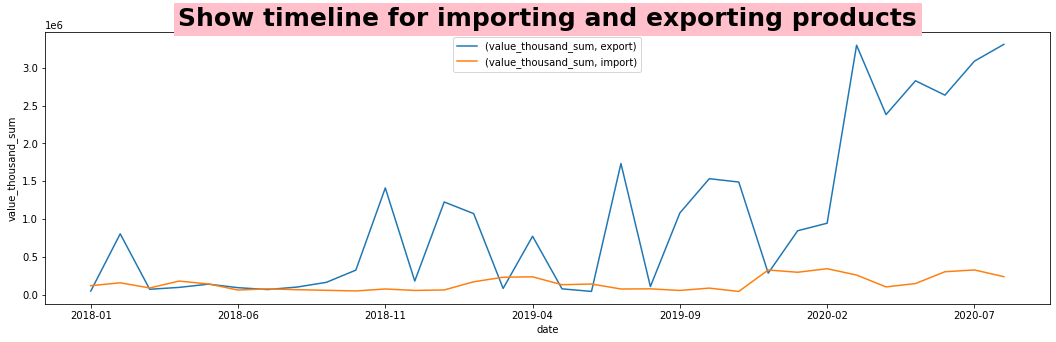

In [37]:
pv.plot(figsize=(18,5)); # นำข้อมูลหลังจากแปลงเป็นข้อมูลสรุปเเล้วที่เก็บไว้ในตัวแปร pv มา plot graph 
plt.legend(loc='upper center') #กำหนด legend ให้อยู่ในตำเเหน่งที่ไม่ปิดบังเส้นกราฟ 
plt.title("Show timeline for importing and exporting products",weight='bold', 
          fontsize=25, color="black",backgroundcolor='pink') #เเสดงชื่อกราฟพร้อมตกเเต่งสี 
plt.ylabel('value_thousand_sum') #ชื่อค่าของเเกน y ในที่นี้คือมูลค่าสินค้าในหน่วย พันบาท

**อธิบายผลลัพธ์**
- จากกราฟทำให้ทราบว่ามูลค่าการส่งออกของไทยนั้นมากกว่าการนำเข้าเป็นจำนวนมาก ซึ่งเป็นสัญญาณที่ดี เนื่องจากยิ่งมีการส่งออกไปมากเท่าใดยิ่งมีผลทำให้<br>เศรษฐกิจไทยดีขึ้นตามไปด้วย หมายความว่าการส่งออกสินค้าของไทยนั้นถือเป็นปัจจัยสำคัญในการเติบโตทางเศรษฐกิจของไทย ซี่งบอกให้ทราบว่าหากในกรณี<br>ที่เกิดเหตุกาณ์ที่ผิดปกติ เช่น การกีดกันทางการค้าเกิดขึ้น หรือสงครามการค้า ทำให้ประเทศคู่ค้าหยุดซื้อสินค้าส่งออกของไทย ไทยก็จะได้รับผลกระทบเป็นอย่างมาก <br>
เเละเมื่อมองจากเเนวโน้มเส้นกราฟจะพบว่าอัตราการส่งออกจะเพิ่มขึ้นเรื่อยๆ เเละเป็นไปได้ว่าในปีหน้ามูลค่าการส่งออกของไทยก็จะเพิ่มขึ้นตามไปด้วย<br>
เต่มูลค่าสินค้านำเข้าของไทยอยู่ในเกณฑ์ที่ไม่เพิ่มเเละไม่ลดมากนัก หรืออยู่ในระดับที่คงที่ตลอดระยะเวลา ทั้ง ปี 2018 2019 เเละ 2020 
______________________________________________________________________________________________________________________________

### 2. ตรวจสอบเเละวิเคราะห์รายการสินค้า
*โดยมีกระบวนการดังนี้*
> - ตรวจสอบว่าสินค้าในการนำเข้า หรือส่งออกนั้นมีรายการสินค้าใดบ้าง <br>
- เเสดงจำนวนรายการสินค้าที่มีการนำเข้า เเละ ส่งออกมากที่สุด 5 ลำดับเเรก หลังจากนั้นผู้จัดทำจะทำการตรวจสอบด้วยว่าสินค้าที่มีลำดับการนำเข้าหรือส่งออกมากที่สุด มาจากประเทศใดมากที่สุด (จะเเสดงถึงจำนวน)  <br> 
- แสดงมูลค่ารวมของสินค้าที่ให้มูลค่ามากที่สุด 10 ลำดับแรก (เเสดงถึงมูลค่าเงิน)  <br> 
- เเสดงรายการสินค้าที่ไทยนำเข้าเเละไทยส่งออกไปมากที่สุดของเเต่ละประเทศ
- เลือกดูรายการสินค้าประเภท ข้าว ซึ่งเป็นสินค้า หรือ อาหารหลักของคนไทย

#### 2.1 ตรวจสอบว่าสินค้าในการนำเข้า หรือส่งออกนั้นมีรายการสินค้าใดบ้าง 

In [38]:
#ตรวจสอบว่าสินค้าในการนำเข้า หรือส่งออกนั้นมีรายการสินค้าใดบ้าง
product = [] # สร้างลิสต์สำหรับเก็บรายการสินค้า
for i in data["product_name"]: # วนลูปเข้าข้อมูลรายกา่รสินค้า 
    if str(i) not in product: # ตั้งเงื่อนไขว่า ถ้ารายการสินค้าที่พบยังไม่ได้มีอยู่ในลิสต์ที่ตั้งไว้ ให้เพิ่มเข้าไปใน list ของ Product 
        product.append(i)
    else: # เเต่ถ้ามีอยู่เเล้วก็ให้ดูตัวถัดไปเลย
        continue
print(product,end='') #เเสดงรายการสินค้าทั้งหมด 

['กรอบและโครงสำหรับแว่นตา', 'กระจก แก้ว และผลิตภัณฑ์อื่น ๆ', 'กระดาษ และผลิตภัณฑ์กระดาษอื่น ๆ', 'กระดาษชำระ', 'กระดาษและกระดาษแข็ง', 'กระเบื้องปูพื้นและปิดผนัง', 'กระเป๋าถือและกระเป๋าอื่น ๆ', 'เคมีภัณฑ์อนินทรีย์', 'กระดาษคราฟท์', 'เคมีภัณฑ์อินทรีย์', 'เคมีภัณฑ์อื่น ๆ', 'ไขมันและน้ำมันจากสัตว์', 'เคมีปรุงแต่งใช้ในการถ่ายรูป', 'กระเป๋า', 'กาแฟ ชา เครื่องเทศ', 'ก๊าซธรรมชาติ', 'กระดาษพิมพ์เขียน', 'กระเปาะแก้วสำหรับหลอดไฟฟ้า หลอดแคโทดเรย์', 'กล้องถ่ายภาพยนต์และส่วนประกอบ', 'กล้องถ่ายรูปและส่วนประกอบ', 'กล้องถ่ายรูป', 'เครื่องคอมพิวเตอร์และอุปกรณ์', 'เครื่องจักรกลอื่น ๆ และส่วนประกอบ', 'คอนแทกเลนซ์และเลนส์', 'เครื่องจักรใช้ในการแปรรูปไม้  และส่วนประกอบ', 'เครื่องจักรใช้ในอุตสาหกรรมและส่วนประกอบ', 'ของเล่น', 'ข้าว', 'เครื่องจักรไฟฟ้าใช้ในการโทรคมนาคมและการสื่อสาร', 'เครื่องจักรไฟฟ้าอื่นๆและส่วนประกอบ', 'กระดาษชำระ กระดาษเช็ดหน้า กระดาษอนามัย', 'กระติกสูญญากาศและส่วนประกอบ', 'กระเป๋าถือ', 'กระเป๋าใส่เศษสตางค์', 'กล้วยไม้', 'กล่องหีบที่ทำด้วยพลาสติก', 'ขนมปังกรอบ', 'ของชำร่วยและเครื่องประดับ', 

In [39]:
# ตรวจสอบจำนวนรายการสินค้าทั้งหมด 
print(len(product)) 

89


*จากผลลลัพธ์จะพบว่ามีรายการสินค้าทั้งหมด 89 รายการสินค้า ซึ่งหากนำมาคิดทุกรายการนั้น ผู้จัดทำคิดว่าอาจมีจำนวนมากจนเกินไป <br>
จึงจะขอเเสดงถึงกลุ่มสินค้าที่มีจำนวนรายการส่งออก เเละนำเข้า เป็นอันดับต้นๆ ของรายการสินค้าทั้งหมด*

#### 2.2 เเสดงจำนวนรายการสินค้าที่มีการนำเข้า เเละ ส่งออกมากที่สุด 5 ลำดับเเรก 
เมื่อ plot graph เเสดงสินค้าที่ส่งออกมากที่สุด 5 ลำดับเเรกเเล้ว
 - ผู้จัดทำจะมีการตรวจสอบด้วยว่าสินค้าที่มีลำดับมากที่สุด ส่งออกหรือนำเข้าจากประเทศใดมากที่สุด

Text(0, 0.5, 'product_name')

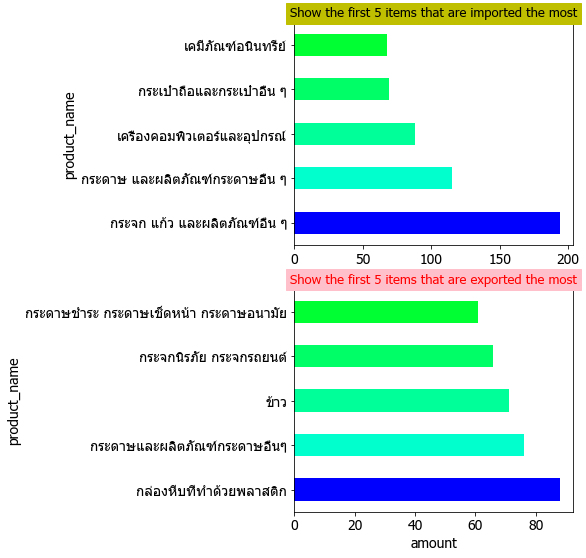

In [40]:
colors = ['b', '#00FFCC', '#00FF99', '#00FF66','#00FF33'] # เก็บข้อมูลสีเพื่อใช้ในการเเสดงกราฟสินค้า
plt.rcParams['font.family']= 'Tahoma' # กำหนด font ให้สามารถ plot ข้อมูลสินค้าเป็นภาษาไทยได้ 
plt.rcParams['font.size']= 14 # กำหนดขนาดตัวอักษรของรายการสินค้า

#สำหรับเเสดงกราฟสินค้านำเข้า 5 ลำดับเเรก
fig = plt.figure(figsize=(5,9)) # กำหนดขนาดของกราฟ 
dat_im = data_use[data_use.type == 'import'] # ตั้งข้อมูลสำหรับสินค้านำเข้า โดยเก็บไว้ในตัวแปร dat_im
plt.subplot(2,1,1)  # เเสดงกราฟที่ 1
# ใช้ข้อมูลสินค้านำเข้ามานับจำนวนเเละดึง 5 ลำดับเเรกมา plot graph 
dat_im['product_name'].value_counts()[:5].plot(kind='barh',color = colors, legend=False) 
plt.title("Show the first 5 items that are imported the most", fontsize=13, color="k",backgroundcolor='y'); #ตั้งชื่อกราฟเเละตกเเต่งสี
plt.xlabel("amount") #กำหนด label ในเเกน xให้เป็นจำนวนรายการสินค้าทั้งหมด
plt.ylabel("product_name") #กำหนด label ในเเกน y เป็นชื่อรายการสินค้า 5 ลำดับเเรก

#สำหรับเเสดงกราฟสินค้าส่งออก 5 ลำดับเเรก
dat_ex = data_use[data_use.type == 'export'] # ตั้งข้อมูลสำหรับเป็นสินค้าส่งออก โดยเก็บไว้ในตัวแปร dat_ex
plt.subplot(2,1,2)  # เเสดงกราฟที่ 2
# ใช้ข้อมูลสินค้าส่งออกมานับจำนวนเเละดึง 5 ลำดับเเรกมา plot graph 
dat_ex['product_name'].value_counts()[:5].plot(kind='barh',color = colors, legend=False) 
plt.title("Show the first 5 items that are exported the most",fontsize=13, color="r",backgroundcolor='pink'); # ตั้งชื่อกราฟ
plt.xlabel("amount")  #กำหนด label ในเเกน x ให้เป็นจำนวนรายการสินค้าทั้งหมด
plt.ylabel("product_name")  #กำหนด label ในเเกน y เป็นชื่อรายการสินค้า  5 ลำดับเเรก

**อธิบายผลลัพธ์** <br>
- จากผลลัพธ์ จะเเสดงรายการสินค้าที่มีจำนวนมากสุดในการส่งออก หรือ นำเข้าสินค้า <br> 
จากกราฟสินค้านำเข้าพบว่า สินค้าจำพวก กระจกเเก้วนั้นไทยนำเข้ามาจำนวนมาก ตามด้วย กระดาษต่างๆ เครื่องคอมพิวเตอร์ เคมีภัณฑ์ เเละกระเป๋า ตามลำดับ <br>
เเละสินค้าที่ไทยส่งออกไปมากที่สุดคือ สินค้าจำพวกพลาสติก กระดาษ รวมถึงข้าวด้วย เเละยังมีกระจกนิรภัยกระจกรถยนต์ เเละกระดาษชำระ เป็นลำดับตามมา
<br> โดยผู้จัดทำต้องการทราบต่อว่า สินค้าที่มีจำนวนรายการนำเข้า เเละ ส่งออกมากที่สุด จะมาจากประเทศใด หรือส่งไปประเทศใดมากที่สุด ดังนี้

##### ตรวจว่าสินค้าที่มีลำดับการนำเข้ามากที่สุด มาจากประเทศใดมากที่สุด

In [41]:
#สินค้านำเข้าที่มากที่สุด กระจก แก้ว และผลิตภัณฑ์อื่น ๆ

# เเสดงรายการจำนวนสินค้ากระจกที่มีการนำเข้าตามประเทศ่เทศต่างๆ 
dat_im[dat_im['product_name'] == 'กระจก แก้ว และผลิตภัณฑ์อื่น ๆ'].country_name_en.value_counts() 

CHINA        158
SINGAPORE     27
VIETNAM        9
Name: country_name_en, dtype: int64

##### ตรวจว่ารายการสินค้าที่ส่งออกไปมากที่สุด ไปที่ประเทศใดมากสุด

In [42]:
#ตรวจสอบสินค้าส่งออก โดยจะเลือก 'กล่องหีบที่ทำด้วยพลาสติก' จากปริมาณในการส่งออกไปมากที่สุด

# เเสดงรายการจำนวนสินค้าประเภท 'กล่องหีบที่ทำด้วยพลาสติก' ที่ส่งออกไปยังประเทศ่เทศต่างๆ
dat_ex[dat_ex['product_name'] == 'กล่องหีบที่ทำด้วยพลาสติก'].country_name_en.value_counts() 

VIETNAM      51
SINGAPORE    36
CHINA         1
Name: country_name_en, dtype: int64

**อธิบายผลลัพธ์** <br> 
- จากผลลัพธ์พบว่า ไทยนำเข้าสินค้าจำพวกกระจกจากจีนมากที่สุด ตามด้วยสิงค์โปร์เเละเวียดนาม ตามลำดับ  <br>
เเละมีการส่งออกสินค้ากล่องหีบที่ทำด้วยพลาสติกไปยัง เวียดนาม มากที่สุด ต่อด้วย สิงค์โปร์ เเละ จีน ตามลำดับ <br>
ดังนั้นเมื่อทราบว่าจีนเเละเวียดนามมีผลมากสุดต่อการส่งออกเเละนำเข้าสินค้าทั้งสองชนิดนี้ ก็จะช่วยให้ไทยมีเเนวทางในการปฎิสัมพันธ์กับประเทศเพื่อนบ้าน <br>ในกรณีที่ต้องการรักษาอัตราการนำเข้าหรือส่งออกของสินค้าทั้งสองชนิดให้คงอยู่ เป็นต้น 

#### 2.3 แสดงมูลค่ารวมของสินค้าที่ให้มูลค่ามากที่สุด 10 ลำดับแรก
โดยในที่นี้ไม่ได้สนใจว่าสินค้าจะมาจากการนำเข้า หรือส่งออก เพื่อสำรวจรายการสินค้าโดยรวมสำหรับการค้าผ่านเเดนของทั้ง 3 ประเทศนี้ 

In [43]:
# เก็บข้อมูลมูลค่ามากสุด มูลค่ากลาง เเละมูลค่าน้อยที่สุด ของเเต่ละรายการสินค้า  ซึ่งผลลัพธ์จะเเสดงมูลค่า 'mean', 'min' เเละ 'max'ของรายการสินค้านั้นๆ 

data_aggre = data_use.groupby('product_name').value_thousand_sum.agg(['mean', 'min', 'max'])
data_aggre

,mean,min,max
product_name,,,
กรอบรูปไม้,36.583333,0,307
กรอบและโครงสำหรับแว่นตา,642.891892,1,3053
กระจก แก้ว และผลิตภัณฑ์อื่น ๆ,452.371134,0,14770
กระจกนิรภัย กระจกรถยนต์,105.393939,1,1005
กระดาษ และผลิตภัณฑ์กระดาษอื่น ๆ,1873.782609,0,11950
...,...,...,...
แก้วและกระจกอื่นๆ,12.000000,4,20
โกโก้และของปรุงแต่ง,284.392857,2,1116
ไก่,20817.350000,2141,65611


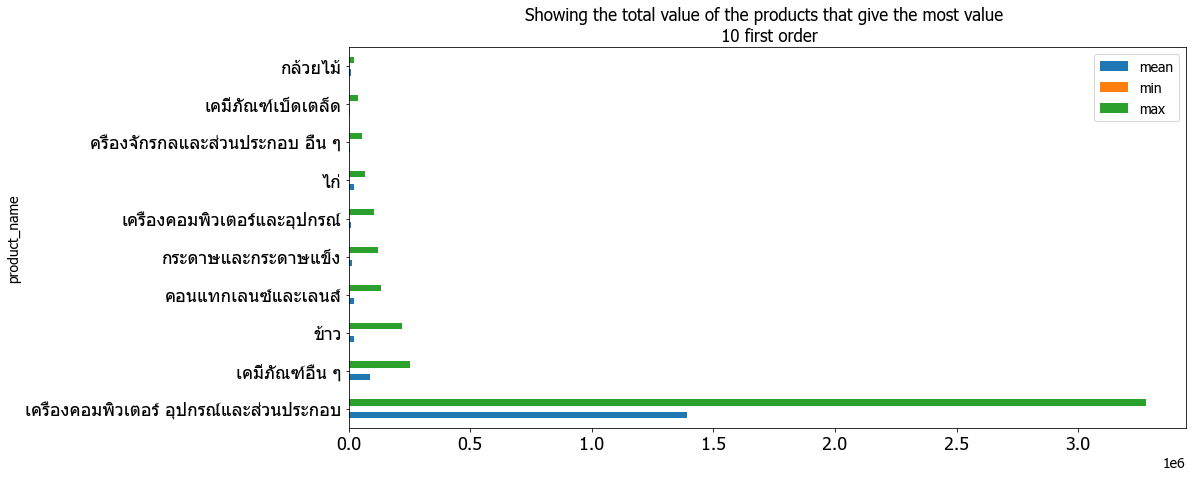

In [44]:
 #ตั้งตัวแปรเก็บรายการสินค้าโดยเลือกจากสินค้าที่ให้มูลค่ามากที่สุด 10 ลำดับเเรก
    
data_tenagg = data_aggre.sort_values(by=['max'],ascending=False).iloc[0:10]
# data_tenagg
# plot graph เเสดงรายการสินค้าที่ให้มูลค่ามากที่สุด 10 ลำดับเเรก โดยเเสดงค่า mean min เเละ max โดยกำหนดขนาดเเละหัวเรื่องกราฟด้วย
data_tenagg.plot(kind='barh',figsize=(15,7), fontsize=18,
                title='Showing the total value of the products that give the most value \n 10 first order')

**อธิบายผลลัพธ์** <br>
 - จากผลลัพธ์จะพบว่าในการค้าผ่านเเดนของไทยนั้น สินค้าที่มีมูลค่ามากที่สุดคือ เครื่องคอมพิวเตอร์ อุปกรณ์เเละส่วนประกอบ เนื่องจากว่าสินค้าจำพวกนี้มีราคาที่ค่อนข้างสูง
ซึ่งสร้างมูลค่าได้มากสุดถึง 3,000,000 กว่าพันบาท หรือ 3,000,000,000 สามพันกว่าล้านบาท เเละยังมีสินค้าอื่นๆ ที่มียอดมูลค่าสินค้าในระดับที่สูงสุด ได้แก่ เคมีภัณฑ์อื่นๆ ข้าว คอนเเทกส์เลนส์ กระดาษ เครื่องคอมพิวเตอร์ ไก่ เครื่องจักรกล เคมีภัณฑ์เบ็ดเตล็ด กล้วยไม้ ตามลำดับ <br> 
ดังนั้นผู้จัดทำต้องการทราบต่อว่าประเทศใดที่เป็นประเทศที่ส่งออกสินค้า คอมพิวเตอร์ มากที่สุด ดังนี้ 

##### ตรวจสอบว่าสินค้าที่มีมูลค่ามากสุด เป็นสินค้านำเข้า หรือส่งออก เเละจากประเทศไทย 
>โดยจะเรียกดูข้อมูลเฉพาะสินค้านำเข้า จากตัวแปล dat_im เเละสินค้าส่งออกจากตัวแปร dat_ex เพื่อใช้ในการวิเคราะห์

In [45]:
dat_im.iloc[100:103] # เรียกดูเฉพาะสินค้านำเข้า

,year,month,type,port_name,province_name,country_name_en,product_name,value_thousand_sum,date
246,2018,4,import,ด่านศุลกากรสะเดา (ศภ.4),สงขลา,SINGAPORE,กระดาษและกระดาษแข็ง,30669,2018-04
247,2018,4,import,ด่านศุลกากรสะเดา (ศภ.4),สงขลา,SINGAPORE,กระเบื้องปูพื้นและปิดผนัง,60,2018-04
248,2018,4,import,ด่านศุลกากรสะเดา (ศภ.4),สงขลา,SINGAPORE,กระเป๋าถือและกระเป๋าอื่น ๆ,148,2018-04


In [46]:
dat_ex.iloc[100:103] # เรียกดูเฉพาะสินค้าส่งออก

,year,month,type,port_name,province_name,country_name_en,product_name,value_thousand_sum,date
160,2018,3,export,ด่านศุลกากรเชียงของ (ศภ.3),เชียงราย,CHINA,โกโก้และของปรุงแต่ง,559,2018-03
161,2018,3,export,ด่านศุลกากรเชียงของ (ศภ.3),เชียงราย,CHINA,ไขมันและน้ำมันจากพืชและสัตว์อื่น ๆ,4,2018-03
162,2018,3,export,ด่านศุลกากรเชียงแสน (ศภ.3),เชียงราย,CHINA,กรอบรูปไม้,2,2018-03


##### ดูว่าสินค้านำเข้าของไทยมี เครื่องคอมพิวเตอร์ อุปกรณ์เเละส่วนประกอบ จากประเทศอื่นหรือไม่ 

In [47]:
#สินค้าที่มีมูลค่ามากที่สุด -> เครื่องคอมพิวเตอร์ อุปกรณ์เเละส่วนประกอบ  จากรายการสินค้านำเข้า 
dat_im[dat_im['product_name'] == 'เครื่องคอมพิวเตอร์ อุปกรณ์และส่วนประกอบ'].country_name_en.value_counts()
# จากผลลัพธ์ สินค้าเครื่องคอมพิวเตอร์ อุปกรณ์เเละส่วนประกอบ ไทยไม่มีการนำเข้าจากประเทศเพื่อนบ้าน

Series([], Name: country_name_en, dtype: int64)

In [48]:
#สินค้าที่มีมูลค่ามากที่สุด -> เครื่องคอมพิวเตอร์ อุปกรณ์เเละส่วนประกอบ  จากรายการสินค้าส่งออก
dat_ex[dat_ex['product_name'] == 'เครื่องคอมพิวเตอร์ อุปกรณ์และส่วนประกอบ'].country_name_en.value_counts() 

CHINA    21
Name: country_name_en, dtype: int64

**จากผลลัพธ์**
- ทำให้เราทราบได้ว่าไทยมีการส่งออกสินค้าเกี่ยวกับเครื่องคอมพิวเตอร์ หรือกลุ่มสินค้าทางด้านเทคโนโลยีออกไปได้มูลค่าจำนวนมากที่สุด เพราะได้มากสุด <br>มากกว่า 3 ล้าน (หน่วยพันบาท) โดยประเทศที่นำเข้าสินค้านี้จากไทยก็คือประเทศจีน ดังนั้นจีนจีงเป็นคู่ค้าหนึ่งที่สำคัญของไทยในการเพิ่มเงินเข้าสู่ประเทสไทยได้  <br>

#### 2.4 เเสดงรายการสินค้าที่ไทยนำเข้าเเละไทยส่งออกไปมากที่สุดของเเต่ละประเทศ 
>ทำให้รู้ได้ว่า เเต่ละประเทศมีสินค้าอะไรโดดเด่น หรือสินค้าอะไรที่ขาดเเคลน เป็นต้น 
โดยจะเริ่มจาก <br>
1. การตั้ง dataframe ขึ้นมาใหม่เพื่อดูว่าสินค้าที่มีการส่งออกหรือนำเข้าไปยังประเทศต่างๆ มีจำนวนเท่าใด <br>
2. นำข้อมูลเหล่านั้นมาหาว่าจำนวนสินค้าที่มากที่สุดของเเต่ละประเทศคืออะไร เเยกตามสินค้านำเข้า เเละส่งออก

In [49]:
# ตั้ง DataFrame จากการนับจำนวนเเถวทั้งหมดของเเต่ละรายการสินค้า เพื่อทราบว่าสินค้าที่มีการนำเข้า หรือ ส่งออกในเเต่ละประเทศมีจำนวนเท่าใด
size_product = data_use.groupby(['type','product_name','country_name_en']).size().reset_index(name='Size')

size_product.sort_values(by=['Size'],ascending=False).head(7) # เรียงลำดับข้อมูลจากที่มีรายการสินค้าจำนวนมากสุดไปน้อยสุด 
#เเสดงรายการสินค้าเเต่ละรายการว่ามีสินค้าทั้งหมดรายการละกี่เเถว เพื่อเป็นข้อมูลเบื้องต้นในการดูว่าจะใช้รายการสินค้าใดมาวิเคราะห์ต่อไป

,type,product_name,country_name_en,Size
100,import,กระจก แก้ว และผลิตภัณฑ์อื่น ๆ,CHINA,158
136,import,เครื่องคอมพิวเตอร์และอุปกรณ์,VIETNAM,86
104,import,กระดาษ และผลิตภัณฑ์กระดาษอื่น ๆ,SINGAPORE,60
105,import,กระดาษ และผลิตภัณฑ์กระดาษอื่น ๆ,VIETNAM,53
34,export,กล่องหีบที่ทำด้วยพลาสติก,VIETNAM,51
111,import,กระดาษและกระดาษแข็ง,SINGAPORE,48
131,import,เคมีภัณฑ์อนินทรีย์,VIETNAM,45


In [50]:
# สินค้าที่นำเข้ามากจากประเทศต่างๆ มากที่สุด
size_productim = size_product[size_product['type'] == 'import'] # ตั้งตัวแปรในการเก็บข้อมูลจำนวนของสินค้าโดยเเยกเฉพาะสินค้านำเข้า
country_im=size_productim.groupby(['country_name_en']).max() # เลือกรายการสินค้านำเข้าจากเเต่ละประเทศที่มีรายการสินค้ามากที่สุด 
country_im # เเสดงรายการสินค้าของเเต่ละประเทศที่ไทยนำเข้ามามากที่สุด

,type,product_name,Size
country_name_en,,,
CHINA,import,กระดาษ และผลิตภัณฑ์กระดาษอื่น ๆ,158
SINGAPORE,import,ไขมันและน้ำมันจากสัตว์,60
VIETNAM,import,เครื่องจักรไฟฟ้าใช้ในการโทรคมนาคมและการสื่อสาร,86


In [51]:
# สินค้าที่ส่งออกไปยังประเทศต่างๆ มากที่สุด
size_productex = size_product[size_product['type'] == 'export'] # ตั้งตัวแปรในการเก็บข้อมูลจำนวนของสินค้าโดยเเยกเฉพาะสินค้าส่งออก
country_ex=size_productex.groupby(['country_name_en']).max() # เลือกรายการสินค้าส่งออกที่มากที่สุดไปยังเเต่ละประเทศ 
country_ex # เเสดงรายการสินค้าส่งออกไปมากที่สุดในเเต่ละประเทศ

,type,product_name,Size
country_name_en,,,
CHINA,export,ไขมันและน้ำมันจากพืชและสัตว์อื่น ๆ,44
SINGAPORE,export,ก๊อก วาวล์และส่วนประกอบ,36
VIETNAM,export,โกโก้และของปรุงแต่ง,51


**อธิบายผลลัพธ์**<br>จากผลลัพธ์ในการเเสดงว่าเเต่ละประเทศมีสินค้าส่งออกจากไทยไป หรือ สินค้าที่ไทยนำเข้ามา มากที่สุดคืออะไร<br>
- ซึ่งผลลัพธ์เเสดงผลได้ดังนี้ สินค้าที่ไทยนำเข้ามากมากสุดจากประเทศ จีน คือ กระดาษ และผลิตภัณฑ์กระดาษอื่น ๆ สิงคโปร์ คือ ไขมันเเละน้ำมันจากสัตว์ เเละสุดท้ายคือ เวียดนาม ได้แก่สินค้า เครื่องจักรไฟฟ้าใช้ในการโทรคมนาคมเเละการสื่อสาร <br>
- เเละสินค้าที่ไทยส่งออกไปมากที่ในเเต่ละประเทศได้แก่ จีน สิงคโปร์ เวียดนาม คือสินค้า ไขมันและน้ำมันจากพืชและสัตว์อื่น ๆ ,ก๊อก วาวล์และส่วนประกอบ,โกโก้และของปรุงแต่ง ตามลำดับ


#### 2.5  เลือกดูรายการสินค้าประเภท ข้าว ซึ่งเป็นสินค้าที่ไทยมีชื่อเสียง เเละ เป็นอาหารหลักของคนไทย

- เรียกดูข้อมูลสินค้า ประเภทข้าว  เพื่อเป็นเเนวทางในการจัดการเรื่องเกษตรกรไทย เเละการส่งออกข้าวของไทยให้มีมูลค่าต่อเศรษฐกิจไทยให้มากที่สุด

In [52]:
rice_data = data_use.query("product_name == 'ข้าว'") # เลือกดูข้อมูลเฉพาะสินค้าเป็น ข้าว 
rice_data.iloc[10:16]

,year,month,type,port_name,province_name,country_name_en,product_name,value_thousand_sum,date
381,2018,7,export,ด่านศุลกากรนครพนม (ศภ.2),นครพนม,VIETNAM,ข้าว,218,2018-07
393,2018,7,export,ด่านศุลกากรมุกดาหาร (ศภ.2),มุกดาหาร,VIETNAM,ข้าว,250,2018-07
406,2018,7,export,ด่านศุลกากรเชียงของ (ศภ.3),เชียงราย,CHINA,ข้าว,23116,2018-07
465,2018,8,export,ด่านศุลกากรเชียงของ (ศภ.3),เชียงราย,CHINA,ข้าว,54930,2018-08
520,2018,9,export,ด่านศุลกากรเชียงของ (ศภ.3),เชียงราย,CHINA,ข้าว,118679,2018-09
525,2018,9,export,ทำเนียบท่าเรือห้าเชียง,เชียงราย,CHINA,ข้าว,473,2018-09


- เเสดงว่าข้าวในเเต่ละปี ส่งออกไปยังประเทศใดเป็นมูลค่าเท่าใด

In [53]:
# โดยการรวมกลุ่มในคอลัมน์ของ type country_name_en เเละ year เเละนับผลรวมมูลค่าสินค้าตามกลุ่มที่จัดไว้โดยใช้ sum
rice_data = rice_data.groupby(['type','country_name_en', 'year',])[["value_thousand_sum"]].sum() 
rice_data #เเสดงผล

value_thousand_sum
type   country_name_en year                    
export CHINA           2018              777674
                       2019              669395
                       2020                3680
       VIETNAM         2018               13638
                       2019               11562
                       2020               22664
import VIETNAM         2020                 825

**จากผลลัพธ์จะพบว่า ในการส่งออกข้าวของไทยนั้นจะส่งออกไปยังประเทศหลักๆ อยู่ 2 ประเทศ คือ จีน เเละ เวียดนาม** <br>
- ซึ่งเมื่อพิจารณาข้าวที่ส่งออกไปยังประเทศจีน จะมีจำนวนที่ลดลงอย่างเห็นได้ชัดในเเต่ละปี เหตุผลอาจมาจากสถานการณ์บ้านเมืองของไทย หรือ ปัญหาเเห้งเเล้งที่ไทยพบเจอ เป็นต้น จึงมีส่วนทำให้การส่งออกสินค้าไปยังประเทศจีนมีปัญหา 
ถ้าลองพิจารณาตัวเลขก็จะพบว่า ในปี 2020 ไทยส่งออกข้าวไปยังจีนน้อยมากๆ เมื่อเทียบกับ สองปีก่อน เหตุผลนี้อาจจะเกี่ยวเนื่องกับสถานการณ์โควิดที่เกิดขึ้น ที่เกษตรกรชาวไทยปลูกข้าวได้ไม่พอกับจำนวน เพราะพบว่าในปี 2020 ไทยก็ได้มีการนำเข้าสินค้าประเภท ข้าว จากเวียดนามเข้ามาด้วย ทั้งๆที่ ปกติ จะไม่นำเข้า ข้าว จากประเทศอื่นๆ 
_______________________________________________________________________________________________________________________________

### 3 เเสดงรายการวิเคราะห์ในการตรวจสอบสินค้าตามพื้นที่ หรือด่านศุลกากรในเเต่ละจังหวัด
- เเสดงกราฟดูว่าจังหวัดใดมีการส่งออก หรือ นำเข้า มากสุด โดยดูดูความถี่ในเเต่ละจังหวัด
- เเสดงจำนวนสินค้าในการส่งออก หรือนำเข้าในเเต่ละประเทศ โดยผ่านด่านตามจังหวัดต่างๆ
- วิเคราะห์ว่าสินค้าที่เป็น Top 3 ของรายการสินค้าทั้งหมด จะมีเส้นทางขนส่งอย่างไรบ้าง


#### 3.1 เเสดงกราฟดูว่าจังหวัดใดมีการส่งออก หรือ นำเข้า มากสุด โดยดูดูความถี่ในเเต่ละจังหวัด

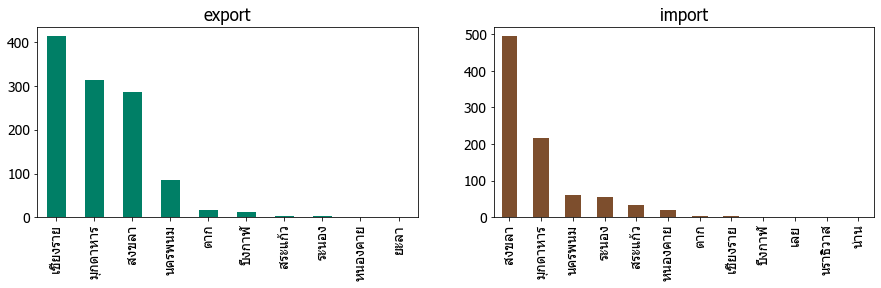

In [54]:
datex = data_use[data_use['type'] == 'export'].province_name.value_counts() # เลือกข้อมูลสินค้าส่งออกโดยนับความถี่ตามเเต่ละจังหวัด
datim = data_use[data_use['type'] == 'import'].province_name.value_counts() # เลือกข้อมูลนำเข้าสินค้าโดยนับความถี่ตามเเต่ละจังหวัด 
fig = plt.figure(figsize=(15,3.5)) # กำหนดขนาดของกราฟ
plt.subplot(1,2,1) # เเสดงในกราฟที่ 1 
datex.plot(kind='bar',title='export',color='#007f66') # plot graph ของสินค้าส่งออก พร้อมกำหนดหัวข้อ เเละใส่สี 
plt.subplot(1,2,2) # เเสดงในกราฟที่ 2
datim.plot(kind='bar',title='import',color='#7d4e2d') #  plot graph ของสินค้านำเข้า พร้อมกำหนดหัวข้อ เเละใส่สี 

**อธิบายผลลัพธ์**  จากผลลัพธ์พบว่า
-  ในการส่งออกจะผ่านจากจังหวัดเชียงรายมากที่สุด ซึ่งก็มีความสอดคล้องกับ ประเทศที่มีการส่งออกไปมากที่สุด คือประเทศจีน หมายความว่าเส้นทางที่ไทยส่งออกสินค้าไปให้จีนน่าจะเป็นจังหวัดเชียงรายมากที่สุด ดังกราฟที่ได้กล่าวมาเเล้ว คือ 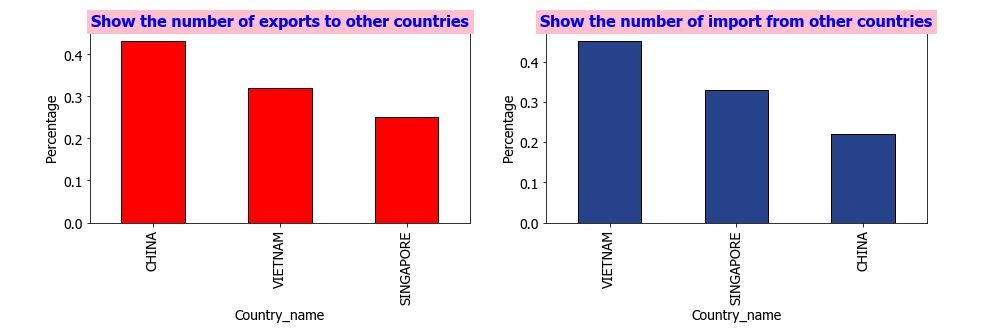กราฟนี้บอกว่า ประเทศจีนเป็นประเทศที่ไทยส่งออกสินค้าไปมากที่สุด เนื่องจากจีนเป็นประเทศที่อยู่บนทิศเหนือของไทยด้วย ดังนั้นจังหวัดของไทยที่อยู่ใกล้ชิดกับจีนในการลำเลียงสินค้าผ่านด่านศุลกากรก็คือ จังหวัดเชียงราย 

- เเละจังหวัดที่มีการนำเข้าสินค้าจากประเทศอื่นๆ มากที่สุด คือจังหวัดสงขลา เมื่อนำมาเทียบกับกราฟด้านบนเเล้ว พบว่าการนำเข้าสินค้าของไทยระหว่างสามประเทศนี้ จะนำเข้าจากประเทศเวียดนามมากที่สุด นั่นหมายความว่าสินค้านำเข้าของไทยส่วนใหญ่จะมาจากทางตอนใต้ หรือมาจากทางทิศใต้ของเวียดนาม เนื่องจากเวียดนามมีพื้นที่ยาวตั้งเเต่ทางทิศเหนือของไทยมายังทิศใต้ ทำให้ผู้จัดทำคาดการ์ได้ว่า สินค้าที่นำเข้าจากเวียดนามนั้น ส่วนใหญ่จะผ่านด่านศุลกากรในจังหวัดสงขลา หรือเป็นสินค้าที่ขนส่งโดยเรือผ่านทะเลจีนใต้เข้ามาทางตอนใต้ของไทย

#### 3.2  เเสดงจำนวนในการนำเข้าเเละส่งออกสินค้า ในเเต่ละประเทศ โดยผ่านด่านตามจังหวัดต่างๆ ดังนี้

Text(0.5, 1.0, 'Show amount of Exporting in each country \n By passing the checkpoints')

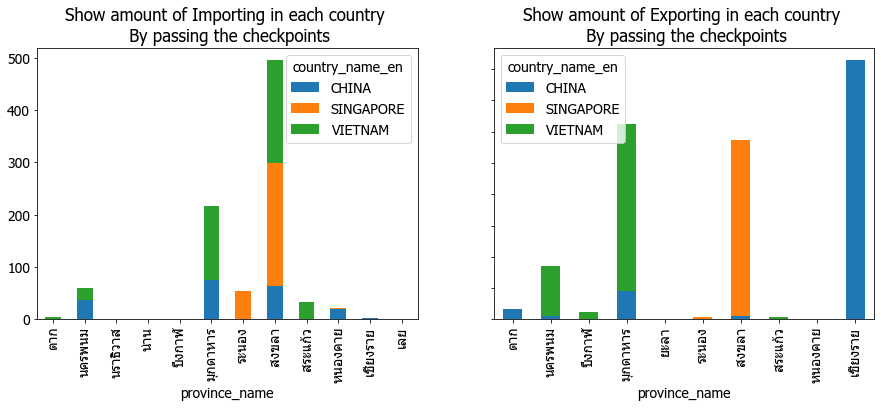

In [55]:
# จากตัวแปรที่เคยตั้งไว้สำหรับสินค้านำเข้าเเละส่งออก 
# dat_im = เฉพาะรายการสินค้านำเข้า
# dat_ex = เฉพาะรายการสินค้า่งออก

figure, axes = plt.subplots(1, 2) # กำหนดหน้าต่างในการเเสดงกราฟให้มีจำนวน 2 column

'''plot กราฟข้อมูล จากการนับจำนวน(Size)การนำเข้าสินค้าผ่านจังหวัดต่างๆโดยเเยกเเต่ละจังหวัดว่ามีประเทศใดบ้าง 
โดยใช้ unstack เพื่อเเปลงมาเป็น dataframe ให้ plot graph ได้ง่ายมากขึ้น  รวมถึงเเสดงกราฟของจังหวัดที่มีการส่งออกไปยังประเทศต่างๆด้วย'''
dat_im.groupby(['province_name','country_name_en']).size().unstack().plot(kind='bar',
                                                                          stacked=True,figsize=(15,5), ax=axes[0])
dat_ex.groupby(['province_name','country_name_en']).size().unstack().plot(kind='bar',
                                                                          stacked=True,figsize=(15,5),sharey = True, ax=axes[1])

# กำหนดหัวข้อกราฟการเเสดงผลในเเต่ละกราฟ 
axes[0].set_title('Show amount of Importing in each country \n By passing the checkpoints', color='k') 
axes[1].set_title('Show amount of Exporting in each country \n By passing the checkpoints',color='k')


**อธิบายผลลัพธ์**
- จากกราฟจะเเสดงว่าในเเต่ละจังหวัดมีปริมาณในการนำเข้าหรือส่งออกสินค้าเป็นจำนวนเท่าใด หากดูจากความยาวเเต่ละสี จะพบว่า ในการนำเข้าสินค้า สงขลาเป็นจังหวัด<br>ที่มีรายการสินค้าจากทั้งสามประเทศมากที่สุด เเสดงว่ามีบางสินค้าที่มาจากจีนเเละผ่านด่านในจังหวัดของสงขลาด้วย อาจจะมาทางเรือขนส่งสินค้า เป็นต้น <br><br>
เเละเมื่อมองกราฟทั้งนำเข้าเเละส่งออกควบคู่กัน จะพบว่า 
- จีนมีเส้นทางการนำเข้าเเละส่งออกอยู่หลายจังหวัด อาทิเช่น นครพนม ตาก มุกดาหาร เเละเชียงรายที่เป็นเส้นทางในการขนส่งสินค้ามากสุด <br>
- สิงคโปร์ จะมีเส้นทางในการขนส่งสินค้าจังหวัด ระนอง สงขลา เเละ หนองคาย โดยสงขลาจะเป็นจังหวัดที่มีการขนส่งมากที่สุดของสิงคโปร์ <br>
- เวียดนามมีเส้นทางการขนส่งสินค้าที่หลากหลายจังหวัด ไม่ว่าจะเป็น ตาก นครพนม มุกดาหาร สงขลา สระเเก้ว บึงกาฬ โดยจังหวัดที่มีโอกาสผ่านบ่อยที่สุด จะเป็น มุกดาหาร

#### 3.3 วิเคราะห์ว่าสินค้าที่เป็น Top 3 ของรายการสินค้าทั้งหมด จะมีเส้นทางขนส่งอย่างไรบ้าง

In [56]:
# ค้นหาสินค้าที่มีจำนวนการนำเข้า หรือ ส่งออกมากที่สุด 
data_agg = data_use.groupby('product_name').size().reset_index(name='Size') # เเสดงรายการสินค้าเเละจำนวนการขนส่งสินค้าของรายการสินค้านั้นๆ 
data_agg.head()

,product_name,Size
0,กรอบรูปไม้,24
1,กรอบและโครงสำหรับแว่นตา,37
2,กระจก แก้ว และผลิตภัณฑ์อื่น ๆ,194
3,กระจกนิรภัย กระจกรถยนต์,66
4,กระดาษ และผลิตภัณฑ์กระดาษอื่น ๆ,115


In [57]:
#เลือกรายการสินค้าที่มีการค้าผ่านเเดนมากสุด 3 อันดับเเรก เก็บไว้ในตัวแปล top
top3 = data_agg.sort_values(by='Size',ascending=False).iloc[:3] 
top3

,product_name,Size
2,กระจก แก้ว และผลิตภัณฑ์อื่น ๆ,194
4,กระดาษ และผลิตภัณฑ์กระดาษอื่น ๆ,115
23,กล่องหีบที่ทำด้วยพลาสติก,88


##### ตัดชื่อ port_name ออกโดยเเสดงเพียง ชื่อด่านศุลกากรเท่านั้น ซึ่งผู้จัดทำได้ทำการตัดคำว่า ด่านศุลกากรออก เพื่อให้ชื่อของด่านสั้นลงในการ plot กราฟมากขึ้น

In [58]:
# เพิ่มคอลัมน์ใหม่เข้า Df สำหรับชื่อด่านศุลกากร เพื่อมีความกระชับมากขึ้น
data_use['newname_port'] = data_use['port_name'].str.slice(start=11) 
data_use.head(2)

,year,month,type,port_name,province_name,country_name_en,product_name,value_thousand_sum,date,newname_port
0,2018,1,export,ด่านศุลกากรนครพนม (ศภ.2),นครพนม,VIETNAM,กระจกนิรภัย กระจกรถยนต์,86,2018-01,นครพนม (ศภ.2)
1,2018,1,export,ด่านศุลกากรนครพนม (ศภ.2),นครพนม,VIETNAM,กล่องหีบที่ทำด้วยพลาสติก,908,2018-01,นครพนม (ศภ.2)


##### เลือกเฉพาะรายการข้อมูลที่มีสินค้าคือ 3 ลำดับเเรกของการค้าผ่านเเดนเพื่อนำมาวิเคราะห์ว่าสินค้าทั้งสามอย่างนั้นมีเส้นทางในการนำเข้า หรือ ส่งออก ณ ด่านใดมากที่สุด*

In [59]:
'''เเสดงเฉพาะข้อมูลที่มีมูลค่าสินค้ามากที่สุด 3 อันดับเเรก  
ได้แก่ ['กระจก แก้ว และผลิตภัณฑ์อื่น ๆ','กระดาษ และผลิตภัณฑ์กระดาษอื่น ๆ','กล่องหีบที่ทำด้วยพลาสติก']'''
data_port = pd.merge(top3, data_use.dropna(), how='left', on='product_name') # join ข้อมูลโดยเอาเเค่เฉพาะรายการสินค้าที่เป็น top3 เท่านั้น
data_port.iloc[120:125] 

,product_name,Size,year,month,type,port_name,province_name,country_name_en,value_thousand_sum,date,newname_port
120,กระจก แก้ว และผลิตภัณฑ์อื่น ๆ,194,2019,7,import,ด่านศุลกากรปาดังเบซาร์ 3(ศภ.4),สงขลา,CHINA,40,2019-07,ปาดังเบซาร์ 3(ศภ.4)
121,กระจก แก้ว และผลิตภัณฑ์อื่น ๆ,194,2019,7,import,ด่านศุลกากรสะเดา (ศภ.4),สงขลา,CHINA,21,2019-07,สะเดา (ศภ.4)
122,กระจก แก้ว และผลิตภัณฑ์อื่น ๆ,194,2019,7,import,ด่านศุลกากรสะเดา (ศภ.4),สงขลา,SINGAPORE,33,2019-07,สะเดา (ศภ.4)
123,กระจก แก้ว และผลิตภัณฑ์อื่น ๆ,194,2019,7,import,ด่านศุลกากรหนองคาย (ศภ.2),หนองคาย,CHINA,8,2019-07,หนองคาย (ศภ.2)
124,กระจก แก้ว และผลิตภัณฑ์อื่น ๆ,194,2019,7,import,รพท.มุกดาหารลานทอง ด่านศุลกากรมุกดาหาร,มุกดาหาร,CHINA,363,2019-07,รลานทอง ด่านศุลกากรมุกดาหาร


##### plot Graph เเสดงเส้นทางการขนส่งสินค้าที่เป็น Top 3 ของรายการสินค้าทั้งหมด

Text(0.5, 1.0, 'Show the top 3 products along the route for import or export.')

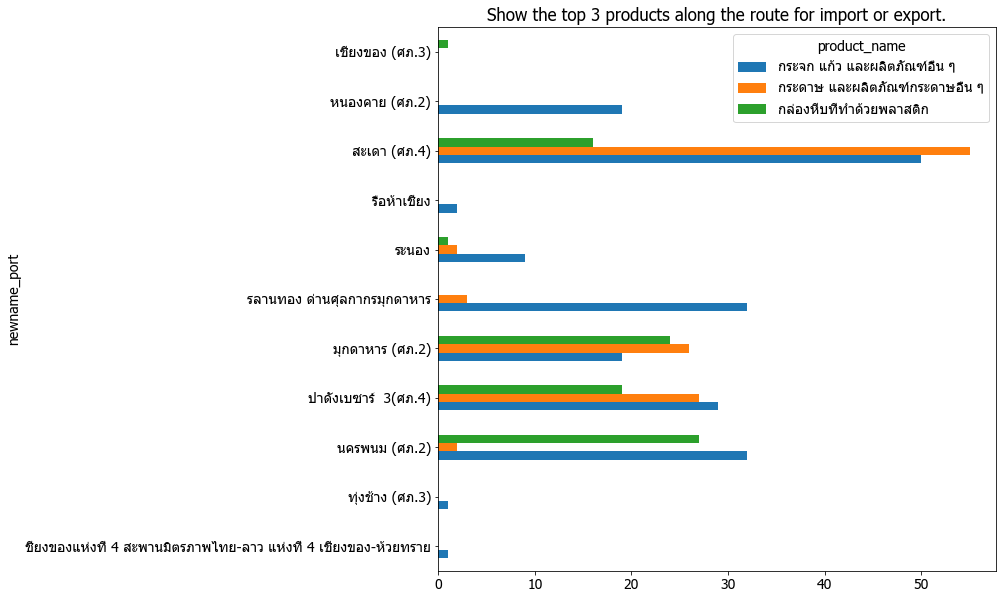

In [60]:
# plot กราฟเเสดง 
data_port.groupby(['newname_port','product_name']).size().unstack().plot(kind='barh',figsize=(10,10)) # เเสดงชื่อด่านเเต่ละด่านที่มีรายการสินค้า top3 ในการอ้างอิง
plt.title('Show the top 3 products along the route for import or export.') # ตั้งชื่อกราฟ

**อธิบายข้อมูล**  <br>
- จากผลลัพธ์สินค้าทั้ง 3 อย่างจะมีเส้นทางในการขนส่งที่ผ่านด่านหลากหลายด่านโดยที่มากที่สุดจะเป็น ด่าน สะเดา (สภ.4) ซึ่งการการขนส่ง การจกเเก้ว เเละกระดาษ เป็นจำนวนมาก เเละด่านอื่นๆ ที่อยู่ในระดับที่มีจำนวนใกล้เคียงกัน 
- จากกราฟสินค้ากระจกแก้วจะเป็นสินค้าที่มีเส้นทางการขนส่งที่หลากหลายที่สุด เกือบทุกด่าน 
- เป็นส่วนหนึ่งในการจัดการบุคลากรประจำด่านตรวจให้เตรียมพร้อมกับปริมาณการขนส่งในเเต่ละด่านได้อย่างดีมากยิ่งขึ้น

#### 3.4 เเสดงรายชื่อด่านศุลกากรที่มีหลากหลายมูลค่าสินค้า 
เนื่องจากในเเต่ละด่านนั้นมีการนำเข้าหรือส่งออกสินค้าในมูลค่าต่างๆ ซึ่งผู้จัดทำต้องการทราบว่า ในหนึ่งด่านนั้นจะมีสินค้าต่างๆ จำนวนกี่มูลค่า <br> โดยเลือกเเสดงเฉพาะ ด่านศุลกากรที่มีจำนวนมูลค่าของสินค้าหลากหลายมากที่สุด 5 อันดับเเรก ดังนี้ 

In [61]:
# เช่น จะดูว่าด่านศุลกากรมุกดาหาร (ศภ.2)นั้นให้มูลค่าสินค้าทั้งหมดจำนวนกี่มูลค่าสินค้า เป็นต้น 

# ใช้ nunique ในการนับจำนวนของมูลค่าทั้งหมดตามรายชื่อเเต่ละด่าน
data_topport = data_use.groupby('port_name')['value_thousand_sum'].nunique() 
# reset index เพื่อให้ข้อมูลอยู่ในรูปแบบ DataFram เเละ ตั้งชื่อ column สำหรับตัวเลขจำนวนนับที่ได้ เป็นชื่อ Total number 
data_topport = data_topport.reset_index(name='Total number')
# เลือกข้อมูล 5 ลำดับเเรกโดยเรียงลำดับจากข้อมูลมากสุดก่อน เเล้วจึงเลือกดูเฉพาะด่านศุลกากรที่มีมูลค่าหลากหลายมากที่สุด 5 อันดับเเรก 
data_topport = data_topport.sort_values(by='Total number',ascending=False).iloc[:5]
data_topport # เเสดงผลลัพธ์ด่านที่ให้มูลค่าสินค้าได้หลายมูลค่า

,port_name,Total number
8,ด่านศุลกากรมุกดาหาร (ศภ.2),369
10,ด่านศุลกากรสะเดา (ศภ.4),363
13,ด่านศุลกากรเชียงของ (ศภ.3),196
4,ด่านศุลกากรนครพนม (ศภ.2),134
7,ด่านศุลกากรปาดังเบซาร์ 3(ศภ.4),128


**อธิบายผลลัพธ์**
- จากผลลัพธ์จะพบว่า  ด่านศุลกากรมุกดาหาร (ศภ.2) เเละ ด่านศุลกากรสะเดา (ศภ.4) นั้นมีจำนวนของมูลค่าสินค้าค้าทั้งหมดที่ใกล้เคียงกัน ดังนั้น อาจสรุปได้ว่า ทั้งสองด่านนี้เป็นด่านที่มีรายการสินค้าต่างๆ ผ่านมามากที่สุด หรือมีการส่งออก หรือนำเข้าจากด่านทั้งสองนี้เป็นจำนวนหลายครั้งเเต่ละครั้งก็เป็นไปได้ว่าอาจเป็นสินค้ารายการเดิม เเต่มีมูลค่าสินค้าเเตกต่างกัน เป็นต้น 

### เเสดงข้อมูลอื่นๆ เพิ่มเติม

เเบ่งช่วงของข้อมูลในส่วนของ มูลค่าสินค้่าต่างๆ 

In [62]:
# bin เพื่อเเปลงเป็นหมวดหมู่ โดยจะเเบ่งจำนวนมูลค่าสินค้า value_thousand_baht เฉพาะสินค้านำเข้า ออกเป็น 3 กลุ่ม เเละดูว่ามีค่าตามกลุ่มต่างๆจำนวนเท่าใด 
binim = data_use[data_use.type == 'import'].value_thousand_sum.value_counts(bins=3)
binim

(-253.919, 84639.333]      883
(84639.333, 169278.667]      6
(169278.667, 253918.0]       4
Name: value_thousand_sum, dtype: int64

In [63]:
# bin โดยจะเเบ่งจำนวนมูลค่าสินค้า value_thousand_baht เฉพาะสินค้าส่งออก ออกเป็น 3 กลุ่ม เเละดูว่ามีค่าตามกลุ่มต่างๆจำนวนเท่าใด 
binex = data_use[data_use.type == 'export'].value_thousand_sum.value_counts(bins=3)
binex

(-3277.6090000000004, 1092536.0]    1125
(2185072.0, 3277608.0]                 6
(1092536.0, 2185072.0]                 5
Name: value_thousand_sum, dtype: int64

**อธิบายผลจากการเเบ่งช่วงข้อมูล**
- จากข้อมูลจะเห็นว่ามีบางข้อมูลที่มีมูลค่าการนำเข้าที่มากที่สุด จำนวน 10 รายการ เพราะมูลค่าสินค้าส่วนใหญ่จะไม่เกิน 84639.333 พันบาท <br>
หรืออยู่ในช่วง 0 - 84639.333 พันบาท <br> 
- เเละมูลค่าในการส่งออกก็จะมีบางสินค้าที่มีมูลค่ามากๆเลยประมาณ 10 มูลค่า ซึ่งเเตกต่างจากกลุ่มข้อมูลส่วนใหญ่ 
ที่มีอยู่ในช่วง 0-1080303.333 พันบาท <br>
ดังนั้นการเเบ่งช่วงข้อมูล ทำให้รู้ว่ามูลค่าการส่งออกของไทยยังได้มากกว่ามูลค่าที่ไทยนำเข้าอยู่มาก 

### การวิเคราะห์เเละเเสดงผลลัพธ์ในอนาคต
#### 1. Explor Product_name in Data
>สำรวจข้อมูลเกี่ยวกับรายการสินค้านำเข้า เเละ สินค้าส่งออก เนื่องจากผู้จัดทำต้องการเเบ่งกลุ่มสินค้าโดยจะเลือกชื่อสินค้าที่มีตัวอักษร 4 ตัวเเรกเหมือนกันให้เป็นกลุ่มเดียวกัน เพื่อลดจำนวนสินค้า หรือความซ้ำซ้อนของสินค้าที่มีชื่อคล้ายกัน เเต่เขียนลงฐานข้อมูลต่างกัน เเต่เนื่องจากยังทำไม่สำเร็จในครั้งนี้ จึงขอนำเป็นเเนวทางในการจัดการข้อมูลในอนาคต ต่อไป ซึ่งผลที่สามารถทำได้มีดังนี้ 

##### แบ่งกลุ่มตามอักษร 4 ตัวเเรก ของชื่อสินค้า

In [64]:
# เลือกตัวอักษร 4 ตัวเเรกของรายการสินค้าที่มีอยู่ ซึ่งผลลัพธ์นี้จะเเสดงรายการสินค้าทั้งหมด  เเต่จะเเสดงเพียงตัวอักษร 4 ตัวเเรกของชื่อสินค้าเท่านั้น
dataa = data_use['product_name'].map(lambda dataa:dataa[:4]) 
product_group = []  # ตั้งตัวเเปรเพื่เก็บ list ข้อมูล
for cut,listproduct in data_use.groupby(dataa):  # วนลูปข้อมูลสำหรับเลือกตัวอัการที่ตัดมาสี่ตัว เเละรายการสินค้าใน 4 ตัวนั้น
    cutt = cut,list(listproduct['product_name']) # ตั้งตัวแปรเพื่อเก็บข้อมูล ตัวย่อ เเละรายการสินค้าทั้งหมดของตัวย่อนั้นๆ 
    product_group.append(cutt) # เพิ่มข้อมูลลง list ที่สร้างไว้ 
product_group = pd.DataFrame(product_group,columns=['Abbrev','product']) # นำผลลัพธ์ที่ได้มาตั้งเป็น dataframe 
product_group.iloc[19:30] # เลือกดูข้อมูล
#เมื่อเเบ่งเเล้วจะพบว่ามีกลุ่มของรายการสินค้าจำนวน 30 กลุ่มรายการสินค้า จากทั้งหมด 89 รายการสินค้า 

,Abbrev,product
19,ข้าว,"[ข้าว, ข้าวโพด, ข้าว, ข้าว, ข้าวโพดหวาน, ข้าว,..."
20,ครั่,"[ครั่ง, ครั่ง]"
21,ครื่,"[ครื่องแต่งกายและเข็มขัด, ครื่องแต่งกายและเข็ม..."
22,คอนแ,"[คอนแทกเลนซ์และเลนส์, คอนแทกเลนซ์และเลนส์, คอน..."
23,เคมี,"[เคมีภัณฑ์อินทรีย์, เคมีภัณฑ์อินทรีย์, เคมีภัณ..."
24,เครื,[เครื่องกีฬาและเครื่องเล่นเกมสำหรับเล่นในห้อง ...
25,เคหะ,[เคหะสิ่งทอ]
26,แก้ว,"[แก้วและกระจกอื่นๆ, แก้วและกระจกอื่นๆ]"
27,โกโก,"[โกโก้และของปรุงแต่ง, โกโก้และของปรุงแต่ง, โกโ..."
28,ไก่,"[ไก่, ไก่, ไก่, ไก่, ไก่, ไก่, ไก่, ไก่, ไก่, ..."


##### เเสดงเฉพาะข้อมูลในเเต่ละกลุ่ม จาก ตัวย่อ 4 ตัวเเรก 

In [65]:
#ใช้ข้อมูลจากด้านบนโดยเลือก column product มา unique เพื่อเเสดงเฉพาะรายการสินค้าที่ไม่ซ้ำกัน
product_groupmap = product_group['product'].map(pd.unique) 
product_groupmap = pd.DataFrame(product_groupmap) # นำเข้า dataframe 
product_groupmap.iloc[19:30]  # เเสดงผล

,product
19,"[ข้าว, ข้าวโพด, ข้าวโพดหวาน, ข้าวโพดอ่อน]"
20,[ครั่ง]
21,"[ครื่องแต่งกายและเข็มขัด, ครื่องจักรกลและส่วนป..."
22,[คอนแทกเลนซ์และเลนส์]
23,"[เคมีภัณฑ์อินทรีย์, เคมีภัณฑ์เบ็ดเตล็ด, เคมีภั..."
24,[เครื่องกีฬาและเครื่องเล่นเกมสำหรับเล่นในห้อง ...
25,[เคหะสิ่งทอ]
26,[แก้วและกระจกอื่นๆ]
27,[โกโก้และของปรุงแต่ง]
28,[ไก่]


##### เลือกเฉพาะตัวเเทนข้อมูลเพื่อเป็นค่าตัวเเทนของเเต่ละกลุ่ม 

In [66]:
# จากผลลัพธ์ด้านบนจะทำให้ได้รายการหลากหลายข้อมูล จึงจะทำการเลือกตัวเเทนข้อมูล เพื่อนำค่าเเรกของเเต่ละกลุ่มไปใส่ในข้อมูลของ product_name 
listproduct = [] # ตั้ง lilst เพื่อเก็บข้อมูล
for i in product_groupmap: # วนลูปข้อมูลจากตัวแปร product_groupmap (เป็นรายการสินค้าของเเต่ละกลุ่ม)
    for j in product_groupmap[i]: #วนลูปเข้าเเต่ละรายการ
        listproduct.append(j[0]) # กำหนดให้นำข้อมูลเเรกของเเต่ละกลุ่มเข้า list ที่สร้างไว้ 
listproduct # เเสดง list ที่เก็บผล จะได้รายการสินค้าที่เป็นตัวเเทนของกลุ่มต่างๆ 

['กรอบและโครงสำหรับแว่นตา',
 'กระจกนิรภัย กระจกรถยนต์',
 'กระดาษชำระ กระดาษเช็ดหน้า กระดาษอนามัย',
 'กระติกสูญญากาศและส่วนประกอบ',
 'กระสอบ',
 'กระเป๋าถือ',
 'กล่องหีบที่ทำด้วยพลาสติก',
 'กล้วยไม้',
 'กล้องถ่ายรูป',
 'กาแฟ ชา เครื่องเทศ',
 'กุญแจสายยู',
 'กุ้ง',
 'ก๊อก วาวล์และส่วนประกอบ',
 'ก๊าซธรรมชาติ',
 'ขนมปังกรอบ',
 'ของชำร่วยและเครื่องประดับ',
 'ของอื่นๆที่ทำด้วยอลูมิเนียม',
 'ของเบ็ดเตล็ดอื่น ๆ ทำด้วยโลหะสามัญ',
 'ของใช้ในเทศกาลอี่น ๆ',
 'ข้าว',
 'ครั่ง',
 'ครื่องแต่งกายและเข็มขัด',
 'คอนแทกเลนซ์และเลนส์',
 'เคมีภัณฑ์อินทรีย์',
 'เครื่องกีฬาและเครื่องเล่นเกมสำหรับเล่นในห้อง (บิลเลียด วิดีโอเกม ไพ่ ฯลฯ)',
 'เคหะสิ่งทอ',
 'แก้วและกระจกอื่นๆ',
 'โกโก้และของปรุงแต่ง',
 'ไก่',
 'ไขมันและน้ำมันจากพืชและสัตว์อื่น ๆ']

>- จากผลลัพธ์ด้านบน ผู้จัดทำยังไม่ทราบว่าจะนำ รายการสินค้ากลุ่มใหม่ ไปเเทนที่ในรายการสินค้าที่มีอยู่ได้อย่างไร จึงทำการเเสดงผลลัพธ์ให้ดูว่า หากเเบ่งรายการสินค้าตามกลุ่มจะได้รายการสินค้าทั้งหมด 30 รายการสินค้า ซึ่งในอนาคตหากมีโอกาสจะทำการนำรายการสินค้าชุดใหม่เข้า dataframe ของข้อมูล เพื่อใช้ชื่อรายการสินค้าตามกลุ่มรายการสินค้าได้ เเละสามารถที่จะเเสดงผลลัพธ์การส่งออกหรือนำเข้าได้ในทุกๆ กลุ่มรายการสินค้า เป็นต้น 

#### 2. ทำนายว่าในปี 2021 อัตราการส่งออกสินค้าของไทยจะลดลงหรือเพิ่มมากขึ้นจากเดิม 
________________________________________________________________________________________________________________________

## หมายเหตุเเละข้อเสนอเเนะ 
> 1. เนื่องจากข้อมูลที่มีอยู่นั้นส่วนใหญ่เป็นประเภทข้อมูล categorical data ซึ่งถือเป็นข้อจำกัดในการ plot Graph ให้มีหลากหลายประเภท เพราะข้อมูลที่ผู้จัดทำนำมานั้นมีค่าข้อมูลที่เป็นประเภท ratio อยู่เพียง 1 column เท่านั้น นั่นคือ column value_thousand_sum(มูลค่าของราคาสินค้า) จึงมีจำนวนในการใช้กราฟที่เป็น Bar Graph มากกว่า Graph ชนิดอื่นๆ 
> 2. มีปัญหาในส่วนของการดึงข้อมูล เนื่องจากช่วงเเรกผู้จัดทำยังไม่ทราบว่าจะ Query ข้อมูลมาอย่างไร ทำให้ใช้เวลาไปกับส่วนการ Query ข้อมูลถึง 1 อาทิตย์ จนสามารถดึงข้อมูลมาเก็บไว้ได้ ซึ่งความจริงเเล้วไม่ควรใช้เวลานานขนาดนั้น 
> 3. ในกรณีที่อาจารย์ต้องการดึงข้อมูลใหม่ ชุดข้อมูลนี้จะมีบางเวลาที่ข้อมูล API ต้นทางไม่สามารถใช้งานได้ เเต่เป็นเเค่บางเวลาเท่านั้น   
